## <b> Evaluation Project 3 Avacado Project </b>

###  <b> Problem Statement:</b>
<em><b>
Avocado is a fruit consumed by people heavily in the United States. 
</b></em>

Content : 
    
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
     
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

- <b>Some relevant columns in the dataset:

    - Date - The date of the observation
    - AveragePrice - the average price of a single avocado
    - type - conventional or organic
    - year - the year
    - Region - the city or region of the observation
    - Total Volume - Total number of avocados sold
    - 4046 - Total number of avocados with PLU 4046 sold
    - 4225 - Total number of avocados with PLU 4225 sold
    - 4770 - Total number of avocados with PLU 4770 sold </b>

<b> Inspiration /Label </b>

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('avocado 2.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.shape

(18249, 14)

In [4]:
print('No of Rows :-',df.shape[0])
print('No of Columns :-',df.shape[1])

No of Rows :- 18249
No of Columns :- 14


In [5]:
print('Columns Name :-',df.columns)

Columns Name :- Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')


In [6]:
df.drop(['Unnamed: 0'], axis = 1 , inplace = True)

In [7]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


**Date, Type , Region are object type , year - int type and reset are float type**

#### Converting Dtype - Date Column Which is object type, Converting into datetime - **datatype**

In [9]:
df['Date']=pd.to_datetime(df.Date)

In [10]:
df['Date'].dtype

dtype('<M8[ns]')

In [11]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

#### **Checking Missing Value by Heatmap**

<AxesSubplot:>

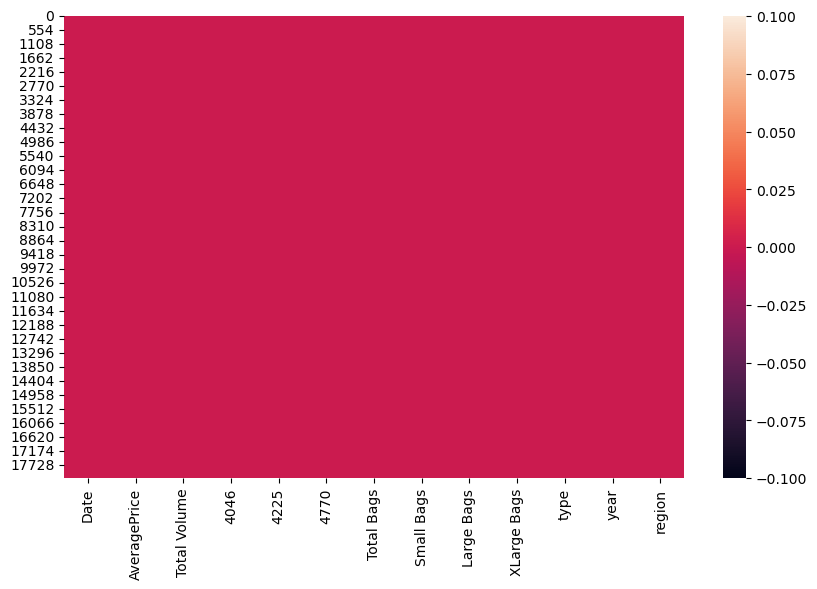

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull())

**No-Nul value present in dataset**

In [13]:
df.duplicated() .sum()

0

 **No Duplicated value present in dataset**

### Statistical Summary

<AxesSubplot:>

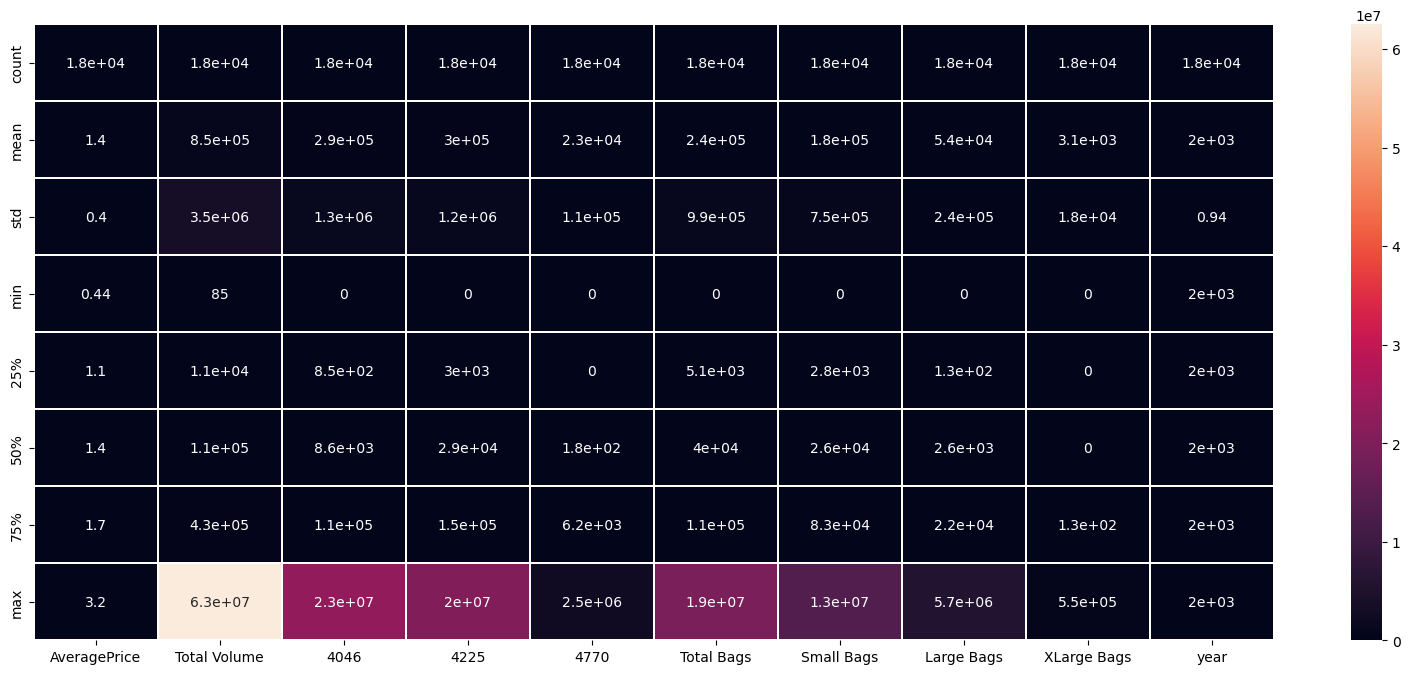

In [14]:
# Visualizing the statistics of the columns using heatmap.
plt.figure(figsize=(20,8))
sns.heatmap(df.describe(),annot = True , linewidths = 0.2)

In [15]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000



- We can easily suspect that some of the features contain outliers after looking at 50% and max columns.
- For most of columns have minimum value of zero.
- Almost in all columns value of mean is greater than median. Data is right skewed.
- For most of columns value of std. deviation is greater than mean i.e. data is spread. 

In [16]:
print("\033[1m"+'Minimum Price of Avocado :'+"\033[0m",df.AveragePrice.min(),'USD')
print("\033[1m"+'Maximum Price of avacado :'+"\033[0m",df.AveragePrice.max(),'USD')
print("\033[1m"+'Average Price of avacado :'+"\033[0m",df.AveragePrice.mean(),'USD')

Minimum Price of Avocado : 0.44 USD
Maximum Price of avacado : 3.25 USD
Average Price of avacado : 1.4059784097758825 USD


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

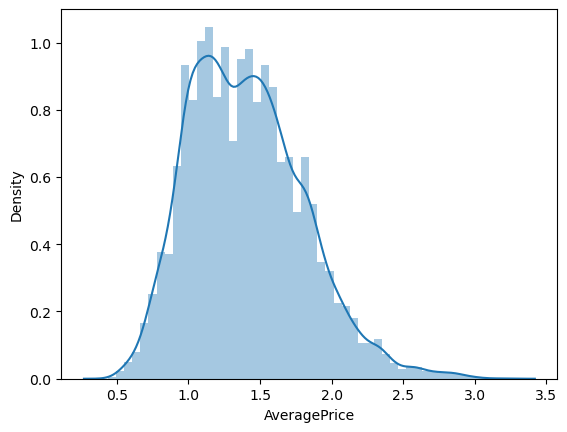

In [17]:
sns.distplot(df['AveragePrice'],kde=True)

- Most of cases Average price of Avacado varies between 1.1 and 1.6 USD/unit

In [18]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [19]:
df.groupby('type')['AveragePrice'].mean()

type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

In [20]:
print("\033[1m"+'Percentage difference in price of avacado :'+"\033[0m",((1.65399-1.1580)/1.1580)*100,"%")

Percentage difference in price of avacado : 42.831606217616596 %



- Oraganic Avocado is almost **43% more costlier** than conventional Avacado.
- We can see that Average Price of Organic Avocado is higher than Conventional Avocado.
- This obvious as cultivation of organic avocado is expensive, time taking process demanding much effort & patience.Also health cautious and quality oriented people are willing to pay more price for it.
    
**Before going deeper with Average price to gain more insight as it has lot more to explore, just let do quick check over volumetric sell of Avacado. Normal tendency of most people is they dont want to pay more price so most probably if such scenerio exist then it will be reflected in total sales.**
    

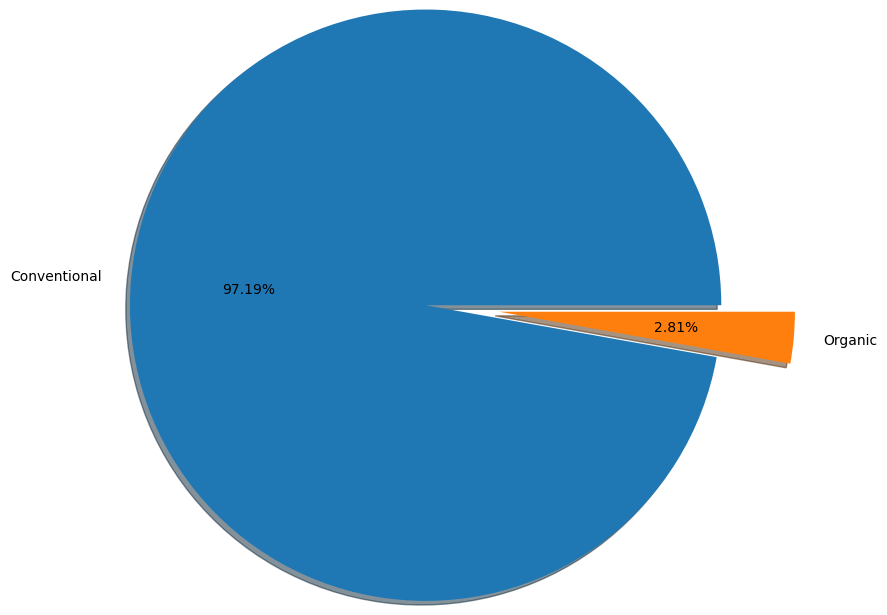

In [21]:
labels = 'Conventional','Organic',
fig, ax = plt.subplots()
ax.pie(df.groupby('type')['Total Volume'].mean(),labels = labels,radius =2,autopct = '%2.2f%%',explode=[0.3,0.2], shadow=True,)
plt.show()

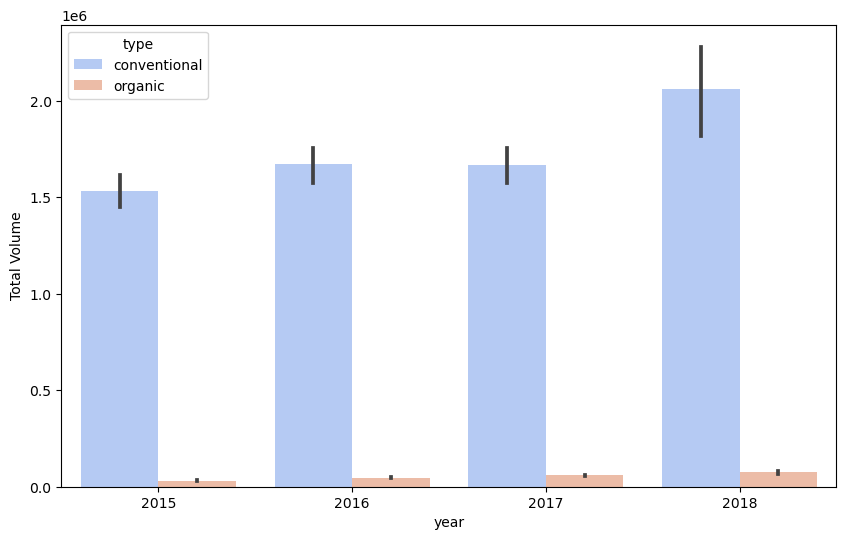

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(x='year', y='Total Volume', hue='type',data=df, palette='coolwarm',ci=68)
plt.show()

- The sell of organic avacodo is less than 2 %.
- Conventional Avacado are in more demand. Due to **Cheap in price**
- Barplot confirm same thing in yearwise sales volume.


In [23]:
pd.crosstab([df.type,df.year],df.AveragePrice, margins= True).style.background_gradient(cmap='summer_r')

In [24]:
df.groupby(['year','type'])['AveragePrice'].agg([min,max,np.mean,np.median])

min   max      mean  median
year type                                      
2015 conventional  0.49  1.59  1.077963    1.08
     organic       0.81  2.79  1.673324    1.67
2016 conventional  0.51  2.20  1.105595    1.08
     organic       0.58  3.25  1.571684    1.53
2017 conventional  0.46  2.22  1.294888    1.30
     organic       0.44  3.17  1.735521    1.72
2018 conventional  0.56  1.74  1.127886    1.14
     organic       1.01  2.30  1.567176    1.55

- Oraganic Avocado is 40-50% costlier than conventional avacado.
- Avacodo got price hike in year 2017 as result of some reason may be inflation,shortage, more wages.
- Except 2017 each year their is incresase in price of avacado. 
    
 **Price hike over time, its okay !!!**
    
But what about demand over timeframe ?, Lets check trend of demand through volume sell in next section. </b>

In [25]:
df.groupby(['year','type'])['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags'].agg([sum])

Total Volume    Total Bags    Small Bags    Large Bags  \
                            sum           sum           sum           sum   
year type                                                                   
2015 conventional  4.296599e+09  7.481009e+08  6.194886e+08  1.231692e+08   
     organic       8.886943e+07  2.409134e+07  1.519414e+07  8.897192e+06   
2016 conventional  4.690250e+09  1.398101e+09  1.064426e+09  3.136371e+08   
     organic       1.306401e+08  6.505765e+07  4.206845e+07  2.298920e+07   
2017 conventional  4.766166e+09  1.541193e+09  1.145835e+09  3.713655e+08   
     organic       1.681399e+08  1.050962e+08  7.711715e+07  2.797352e+07   
2018 conventional  1.334206e+09  4.593696e+08  3.344334e+08  1.177311e+08   
     organic       4.853227e+07  3.216630e+07  2.630799e+07  5.852903e+06   

                   XLarge Bags  
                           sum  
year type                       
2015 conventional   5443128.28  
     organic              0.00  
2016 conventional  20038284.84  
     organic              0.00  
2017 conventional  23991658.41  
     organic           5513.93  
2018 conventional   7205184.07  
     organic           5407.80

- Sales of Avacado in 2017 is more than 2016 so price hike is may be as result of increase in demand or some supply chain issue.
- sales in turn Demand is also increase over time.
- 30 % increase in sale of organic avocado in 2017 compare to 2016, even when it is almost 50% costlier than conventional type.
- There is also growth in demand of conventional type avocado year-wise but rate of growth of demand comparelative less than organic type. May be people becoming more health oriented.
- XLarge Bags sales increase rapidly in 2017 compare to 2015.
- If we look at trend from 2015 customer start buying buying Large or Xlarge bags compare to small bags in case of Conventional type. May be quantity & discount offer by shop may be playing role here.
- People choosing small bags of organic avocado over large.Price factor playing here.

In [26]:
df.sort_values(by=['Date'], inplace=True, ascending=True)

In [27]:
df.groupby(['region'])['Total Volume','AveragePrice'].agg([sum])

,Total Volume,AveragePrice
,sum,sum
region,,
Albany,1.606780e+07,527.63
Atlanta,8.860512e+07,452.23
BaltimoreWashington,1.347139e+08,518.57
Boise,1.441319e+07,455.67
Boston,9.727398e+07,517.44
BuffaloRochester,2.296247e+07,512.69
California,1.028982e+09,471.62
Charlotte,3.555554e+07,542.84


In [28]:
df1=df.copy()

In [29]:
#Removing unuse data from data frame 
df1.drop(['Date','type','region','year'], axis=1, inplace=True)

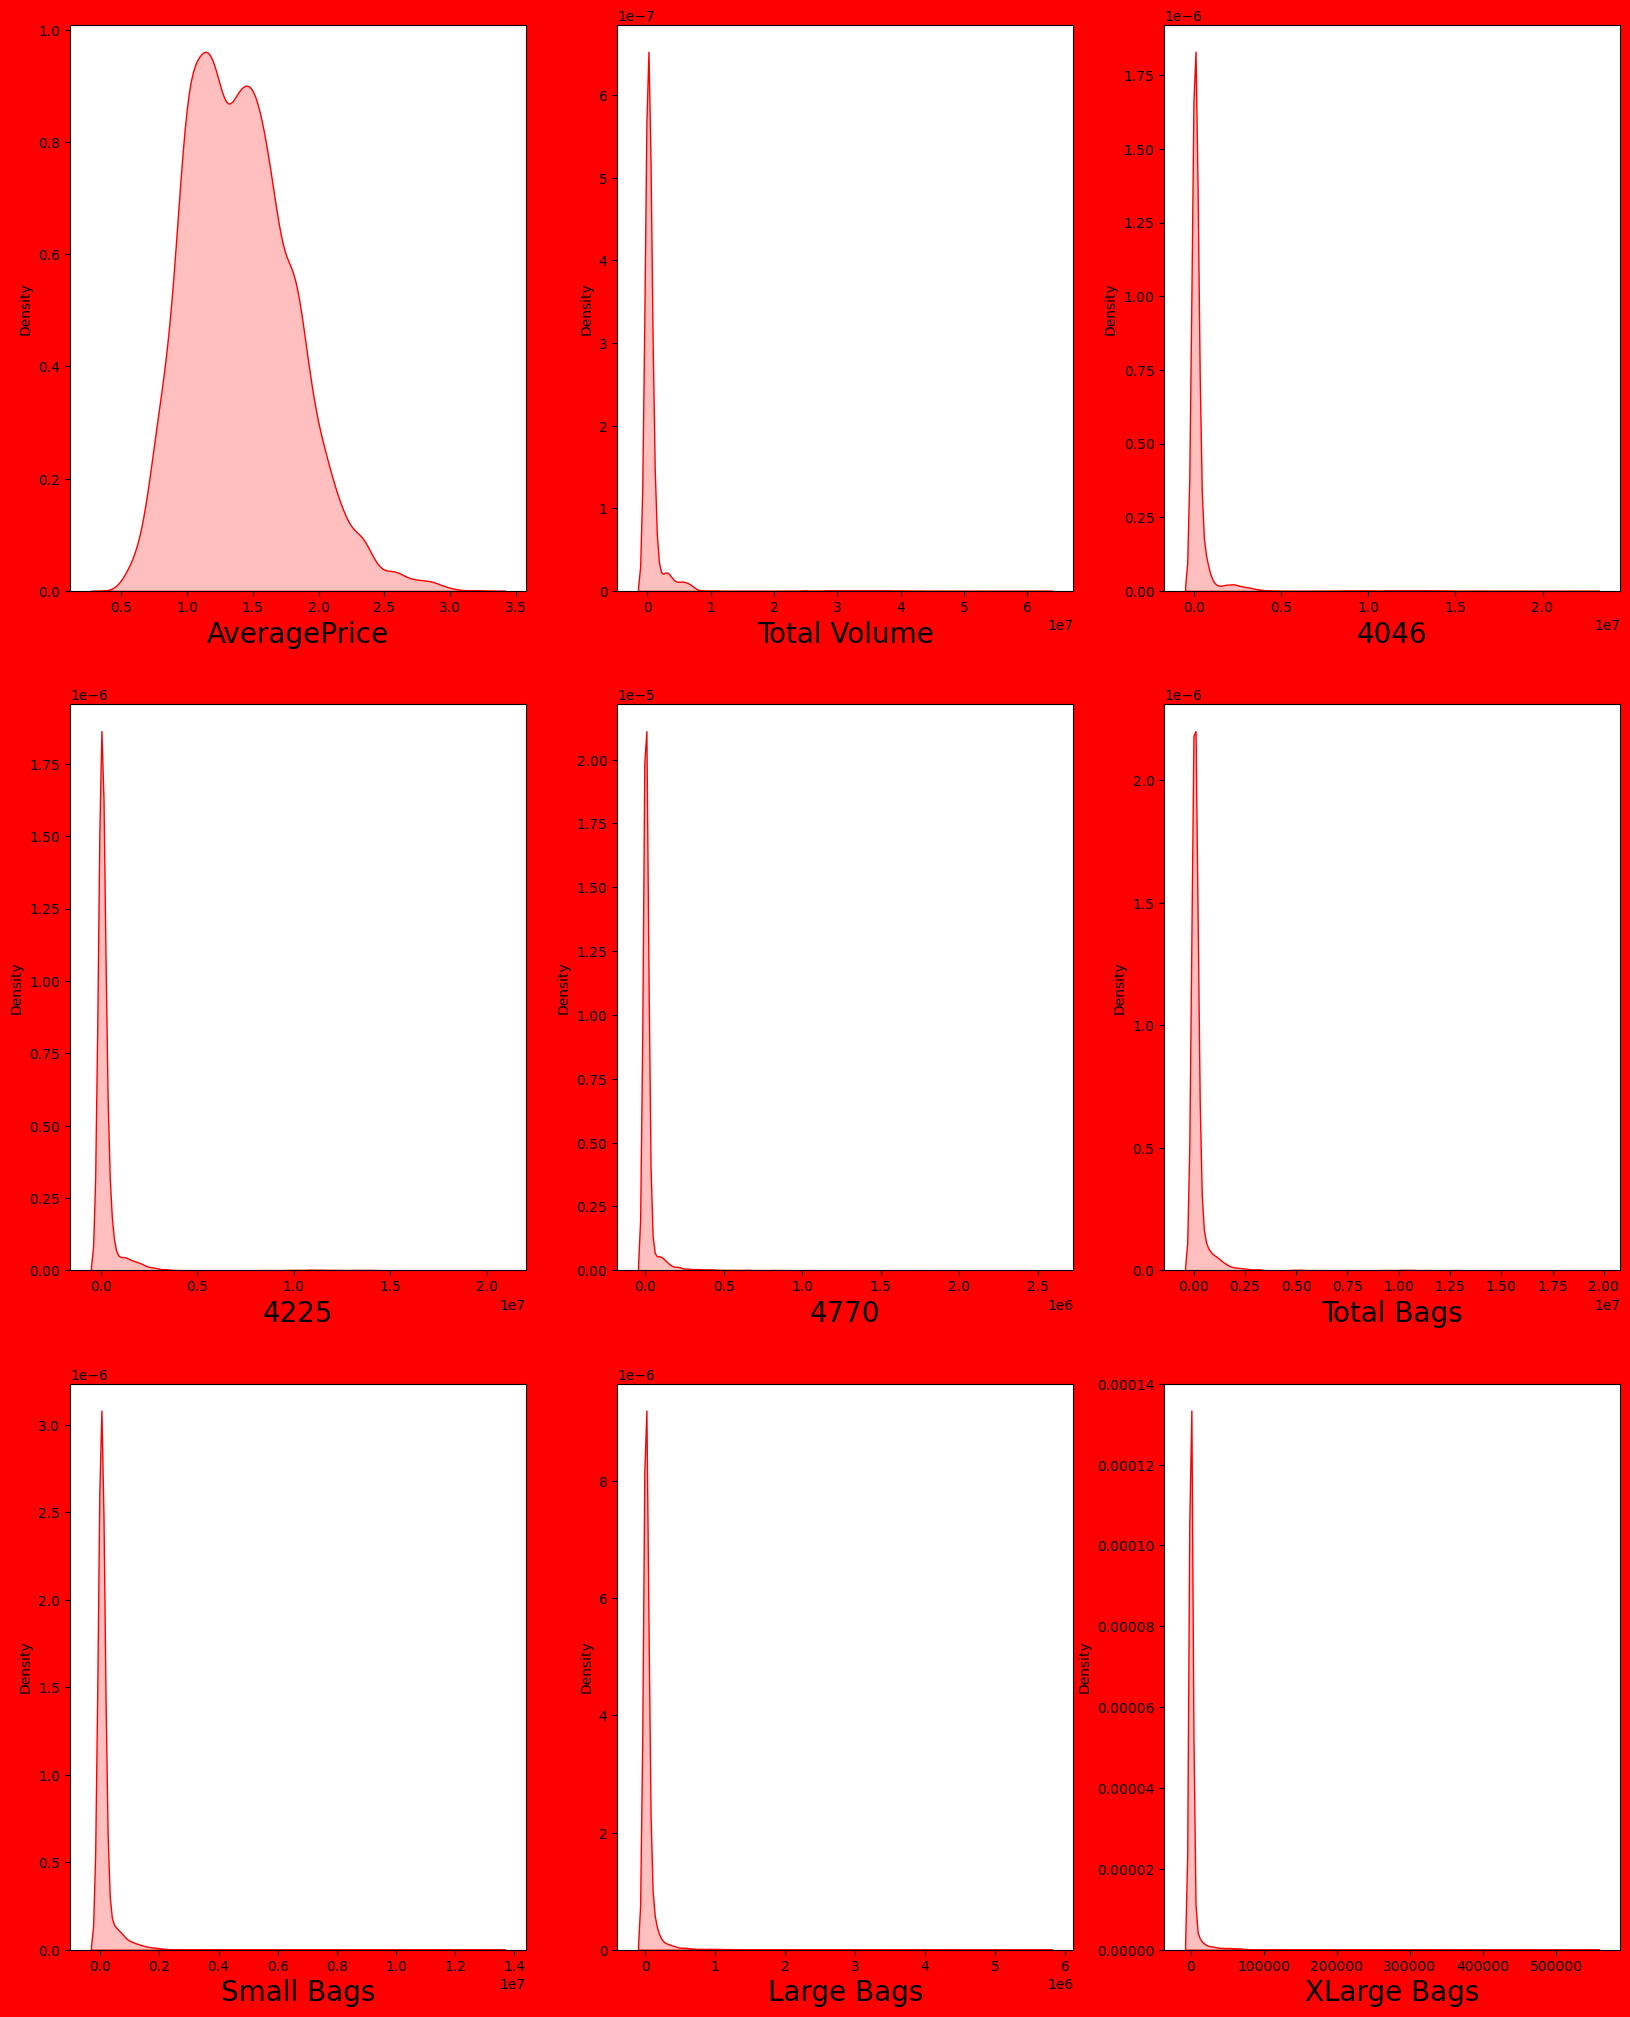

In [30]:
plt.figure(figsize=(20,25), facecolor='red')
plotnumber =1
for column in df1:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df1[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- We can see skewed data with presence of outliers with sharp peak.
- Most of the plots are right skewed, having value of mean very small compare to std. deviation & median. This is resulting in sharp high peak.Very few data points are present as we move away from zero to other end of x-axis.

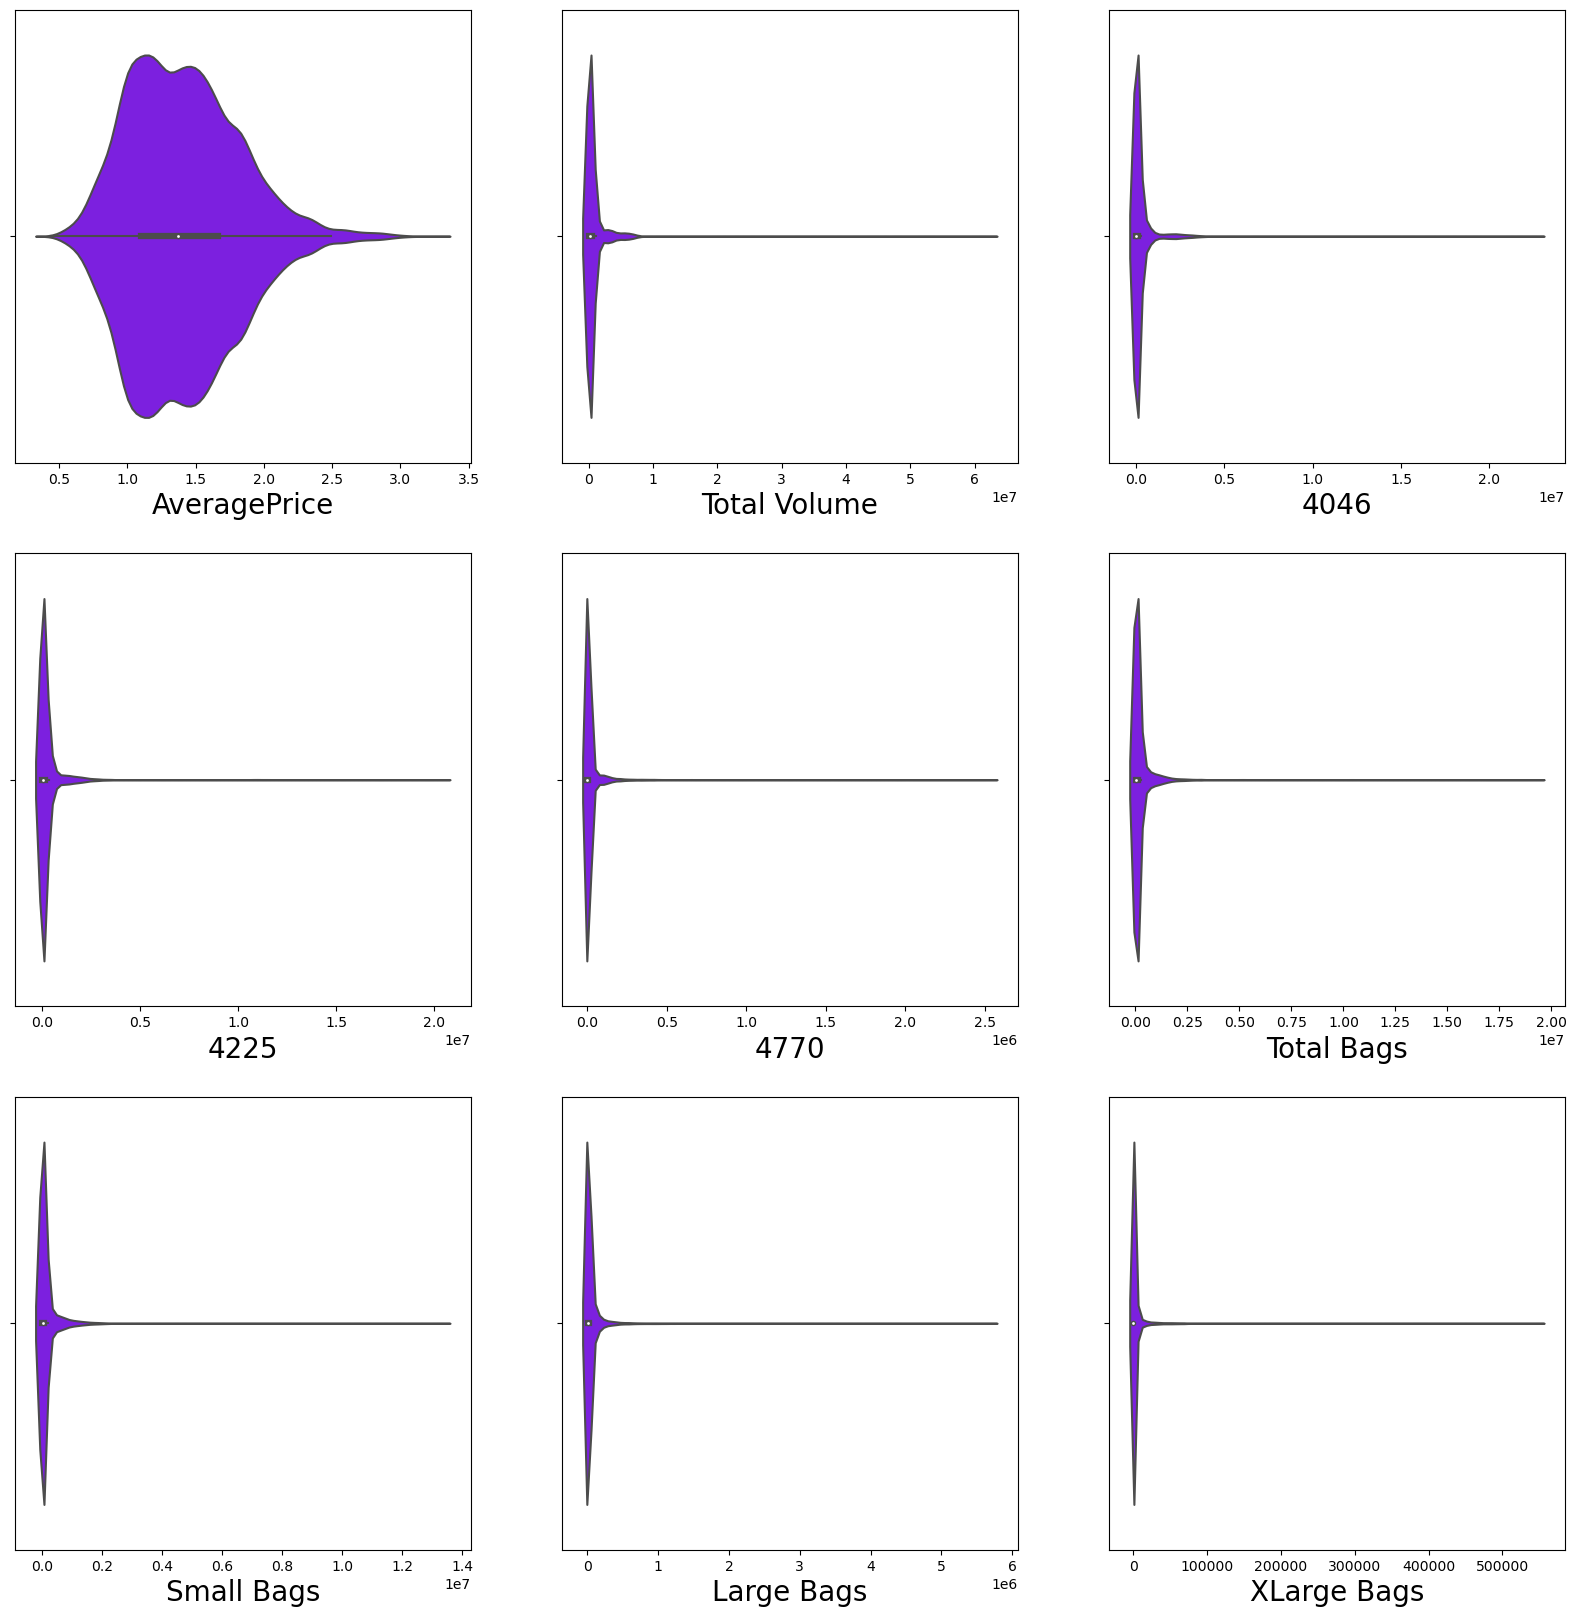

In [31]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20,20), facecolor='white')
plotnumber =1
for column in df1:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.violinplot(df[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

- For Majority Average price is in range of 1 to 1.5.
- Rest of Violin plot show same story as distribution plot.

<b><em> Avacado availability and price also vary over the year according to seasonal changes.Lets check the variation Avg price and sales volume over each month.</em></b>
    
    For that purpose let create another copy dataframe and then split date column into Year,Month and Day.

In [32]:
df=pd.read_csv('avocado 2.csv')

In [33]:
df2=df.copy()

In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [35]:
df2['Year'], df2['Month'], df2['Day'] = df2['Date'].str.split('-').str
df2.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month,Day
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015,12,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015,12,20


In [36]:
df2.drop(columns=['Date','year'], axis=1, inplace=True)
df2.head(2)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20


In [37]:
# Converting Datetime datatypes to int
df2['Year']=df2['Year'].astype(int)
df2['Month']=df2['Month'].astype(int)
df2['Date']=df2['Day'].astype(int)

In [38]:
df2.drop(columns=['Date','Unnamed: 0'], axis =1 , inplace= True)
df2.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20


In [39]:
df2.drop(columns=['Day'], axis =1 , inplace= True)

In [40]:
df2.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12


### Univariate analysis of feature using data , months, year

In [41]:
# Checking unique values and Yearwise total No of sale entry
df2['Year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: Year, dtype: int64

<AxesSubplot:xlabel='Year', ylabel='count'>

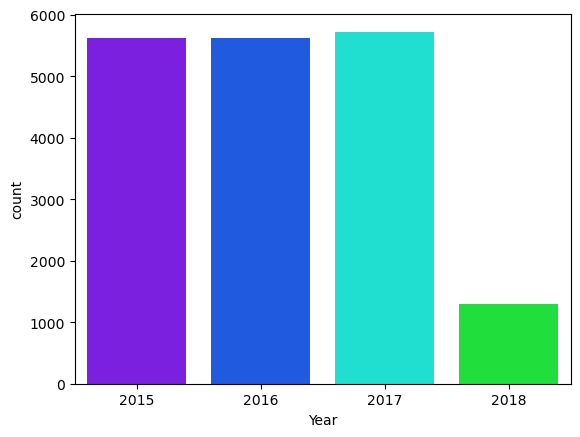

In [42]:
sns.countplot('Year',data=df2)

   - This dataset contain data from 2015 to 2018
   - Maximum sales entry belongs to year 2017 while very few sales entry comes from 2018.

### Month Wise SAle Entries

<AxesSubplot:xlabel='Month', ylabel='count'>

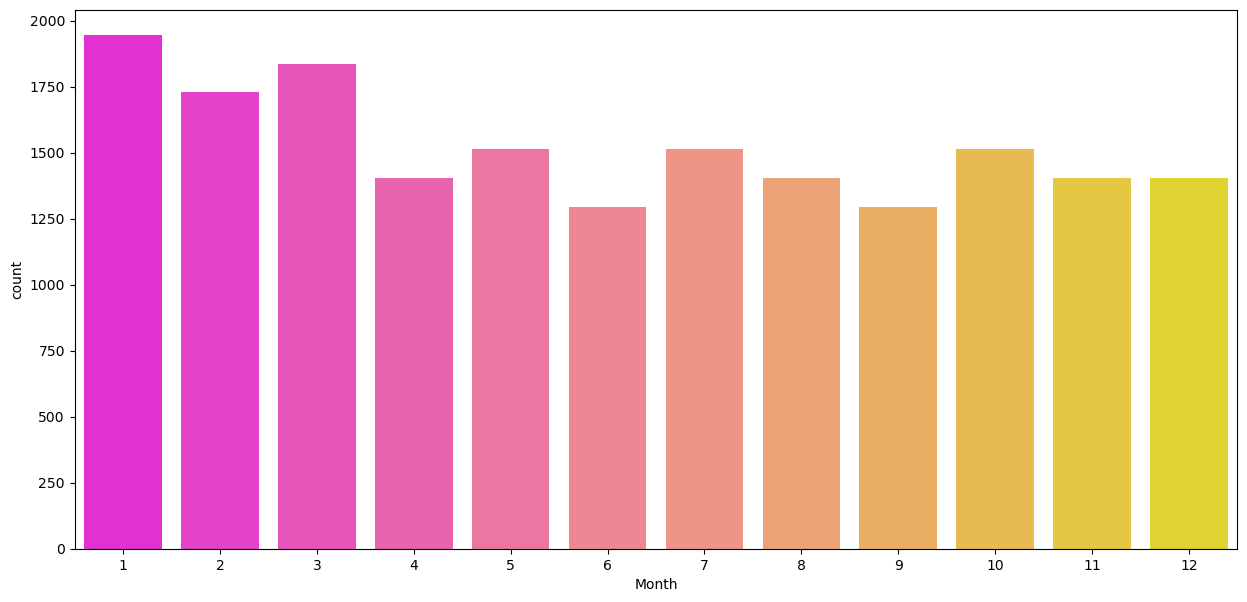

In [43]:
plt.figure(figsize=(15,7))
sns.countplot(x='Month', data=df2, palette="spring")

In [44]:
df2['Month'].value_counts().max()

1944

In [45]:
df2['Month'].value_counts().min()

1294

- Maximum sales lead comes in month of Jan, Feb, March
- Maximum sales demand of Avacodo is in month of Jan (1944 lead) & Minimum sales demand of Avacoda is in month of June

#### Checking Month-Wise Variation in Average Price

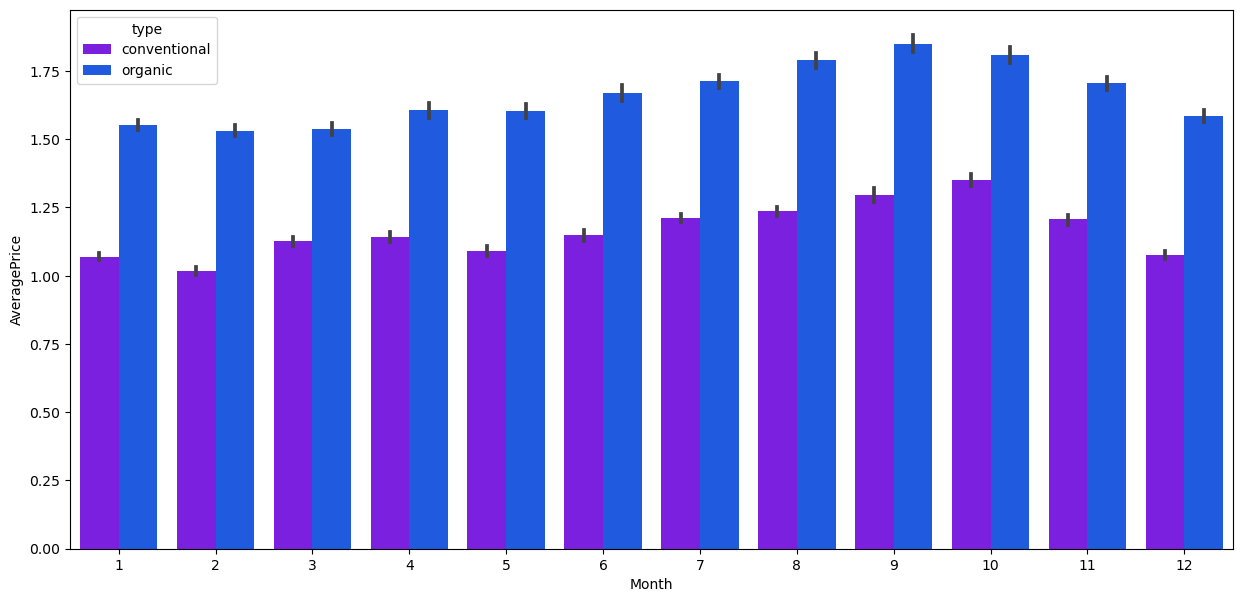

In [46]:
plt.figure(figsize=(15,7))
sns.barplot(x="Month", y="AveragePrice", hue='type', data=df2)
plt.show()

In [47]:
df2.groupby(['Month','type'])['AveragePrice'].agg([np.mean]).T

Month           1                      2                      3             \
type  conventional   organic conventional   organic conventional   organic   
mean      1.069095  1.552942     1.017315  1.531458     1.126209  1.538301   

Month           4                     5             ...           8            \
type  conventional  organic conventional   organic  ... conventional  organic   
mean       1.14235  1.60641     1.089577  1.603624  ...     1.235399  1.78963   

Month           9                      10                     11            \
type  conventional   organic conventional   organic conventional   organic   
mean      1.294738  1.850571     1.349339  1.810026     1.206054  1.705071   

Month           12            
type  conventional   organic  
mean      1.077393  1.585193  

[1 rows x 24 columns]

<Figure size 1000x1000 with 0 Axes>

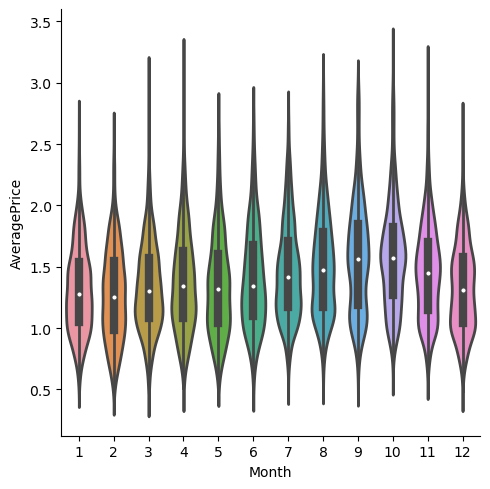

In [48]:
plt.figure(figsize=(10,10))
sns.catplot(x = "Month", y = "AveragePrice", kind ='violin', data=df2, linewidth=2)
plt.show()

- In month of September and October Price of Conventional type of Avacado is comparatively higher than other months.
- There is not much upheaval in Organic type Avacoda over year peroid.
- We can see that variation in mean price values in above groupby table, which confirm what we got from barplot.

<b>In conclusion when Average sale price of 'Conventional Avacado' is high in same time less sales order are observe. Inshort Customer are less interested in buying avacado at high Price. 
</b>

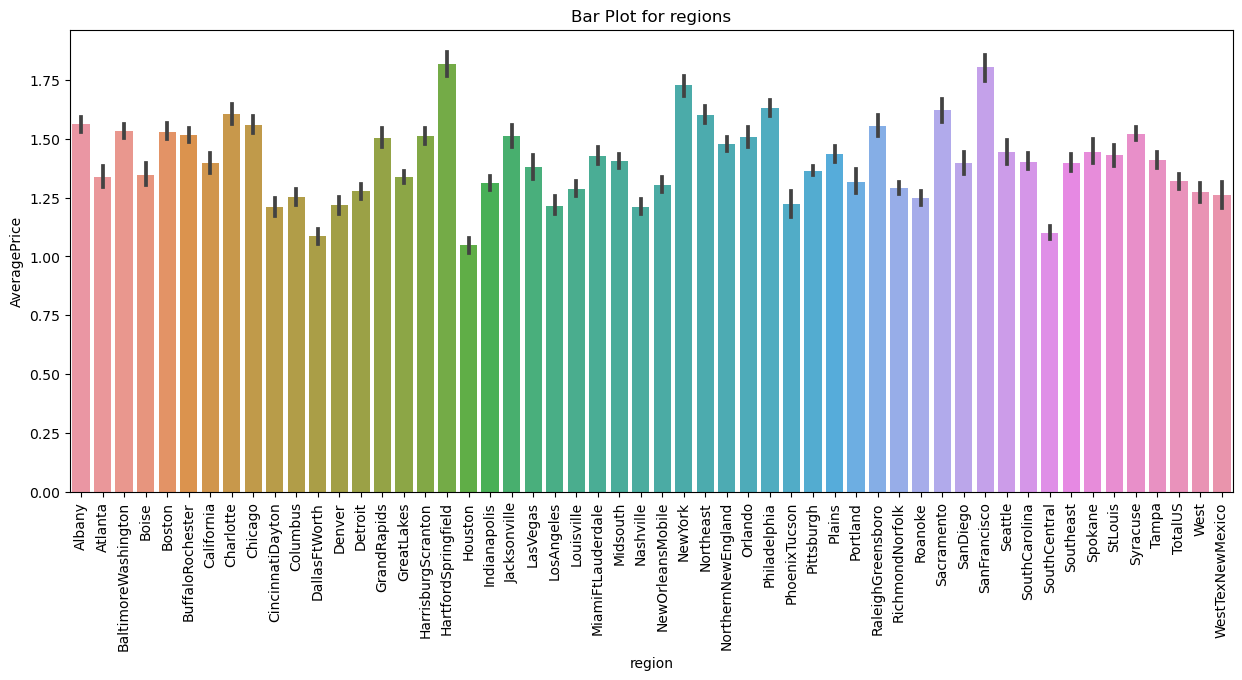

In [49]:
plt.figure(figsize=(15,6))
sns.barplot(x=df['region'],y=df['AveragePrice'], data=df2)
plt.title(f'Bar Plot for regions')
plt.xticks(rotation=90)
plt.show()

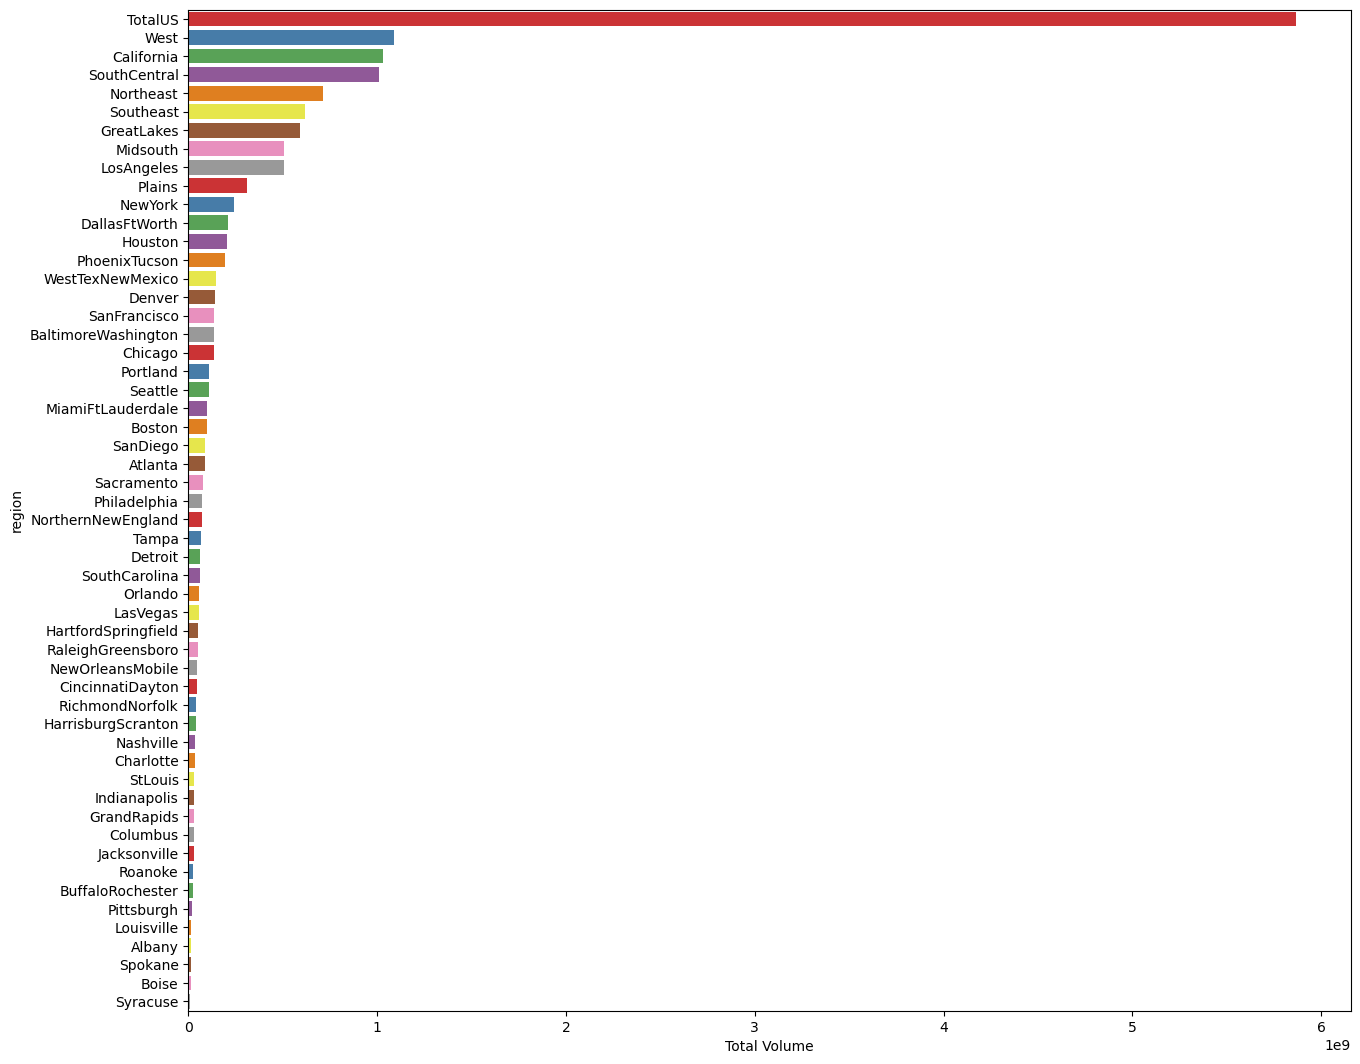

In [50]:
region = df.groupby('region')['Total Volume'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(15,13))
sns.barplot(x=region["Total Volume"], y=region["region"], data=df, palette="Set1")
plt.show()

In [51]:
df.groupby(['region'])['Total Volume','Total Bags','Small Bags','Large Bags','XLarge Bags'].agg([np.mean])

,Total Volume,Total Bags,Small Bags,Large Bags,XLarge Bags
,mean,mean,mean,mean,mean
region,,,,,
Albany,4.753787e+04,7.929747e+03,6.647765e+03,1.153496e+03,128.488639
Atlanta,2.621453e+05,8.449856e+04,5.160573e+04,3.207004e+04,822.786036
BaltimoreWashington,3.985619e+05,1.044561e+05,1.009397e+05,2.903985e+03,612.382722
Boise,4.264257e+04,1.597459e+04,1.384004e+04,2.103634e+03,30.915207
Boston,2.877929e+05,6.359609e+04,5.890659e+04,4.438365e+03,251.124231
BuffaloRochester,6.793630e+04,3.435134e+04,3.037998e+04,3.729050e+03,242.313432
California,3.044324e+06,7.298290e+05,6.778038e+05,3.642585e+04,15599.342929
Charlotte,1.051939e+05,3.460930e+04,3.149069e+04,2.912684e+03,205.927781


- Maximum sales Volume is in South Central While Minimum Sales Volume is in Syracuse.
- Maximum Average Price is in SanFrancisco and Minimum Average Sale price is in Houston.

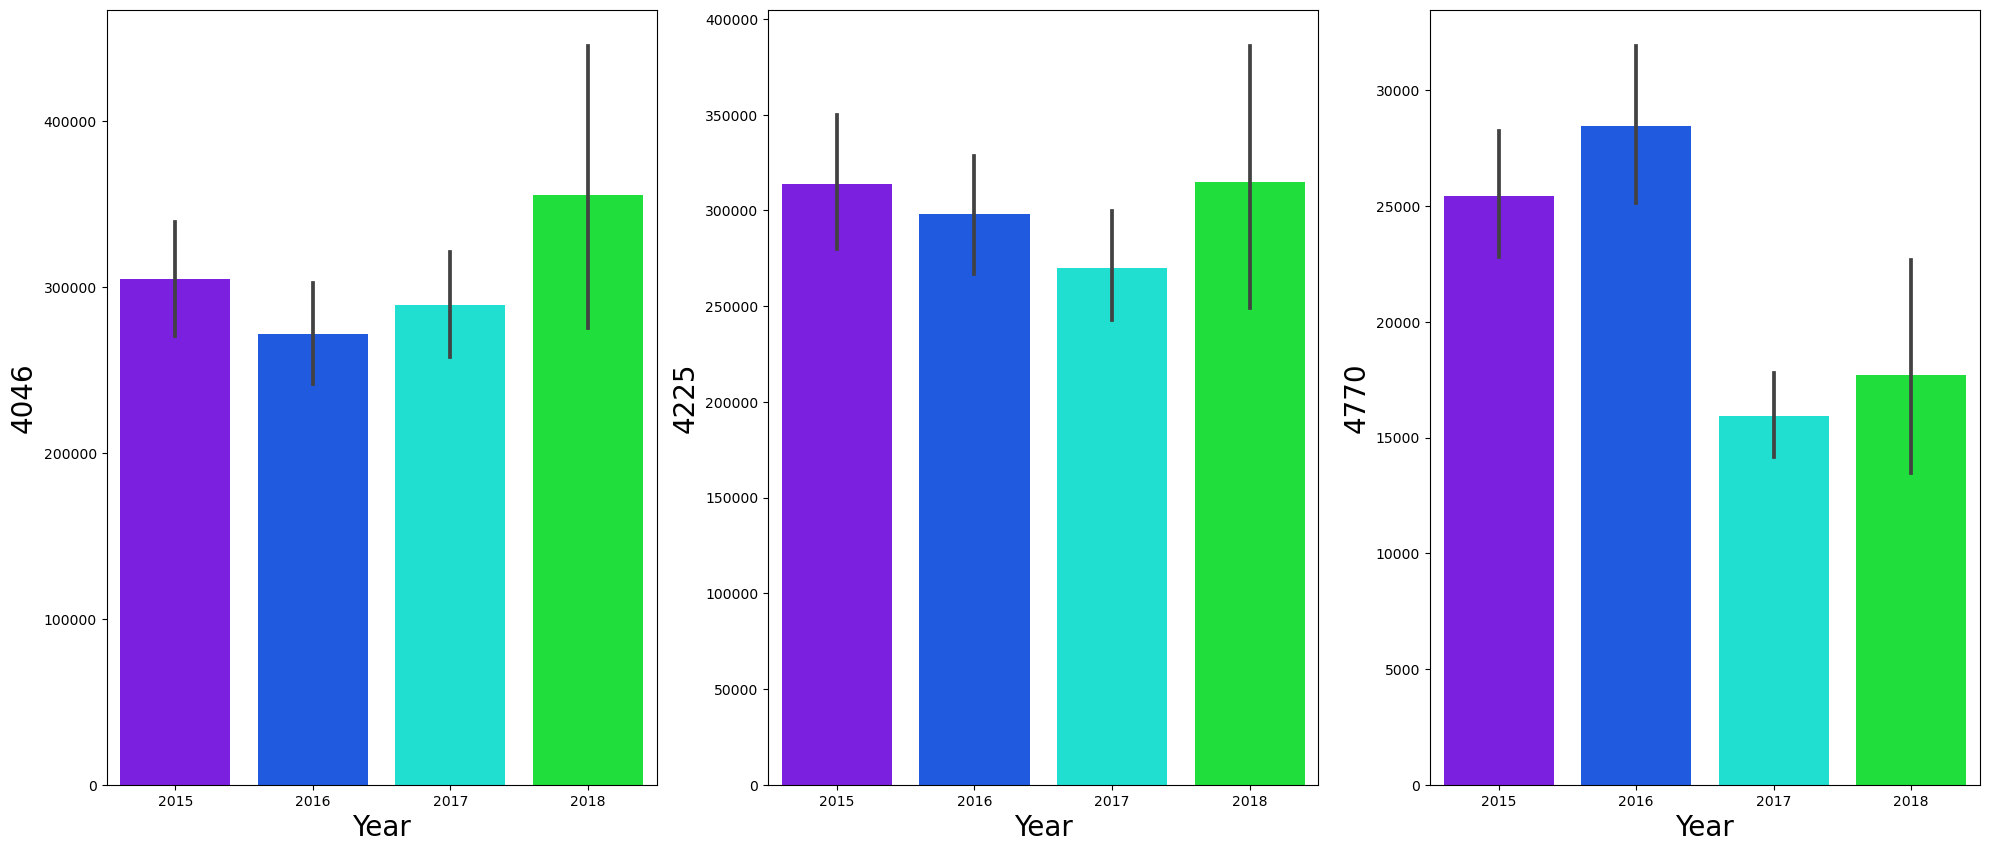

In [52]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
y = df[['4046','4225','4770']]
X = df['year']
for col in y:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.barplot(X,y[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

- Production of PLU 4046 has grown over the 4 years and is greater than the production of PLU 4225 and  PLU 4770, which is least produced. 

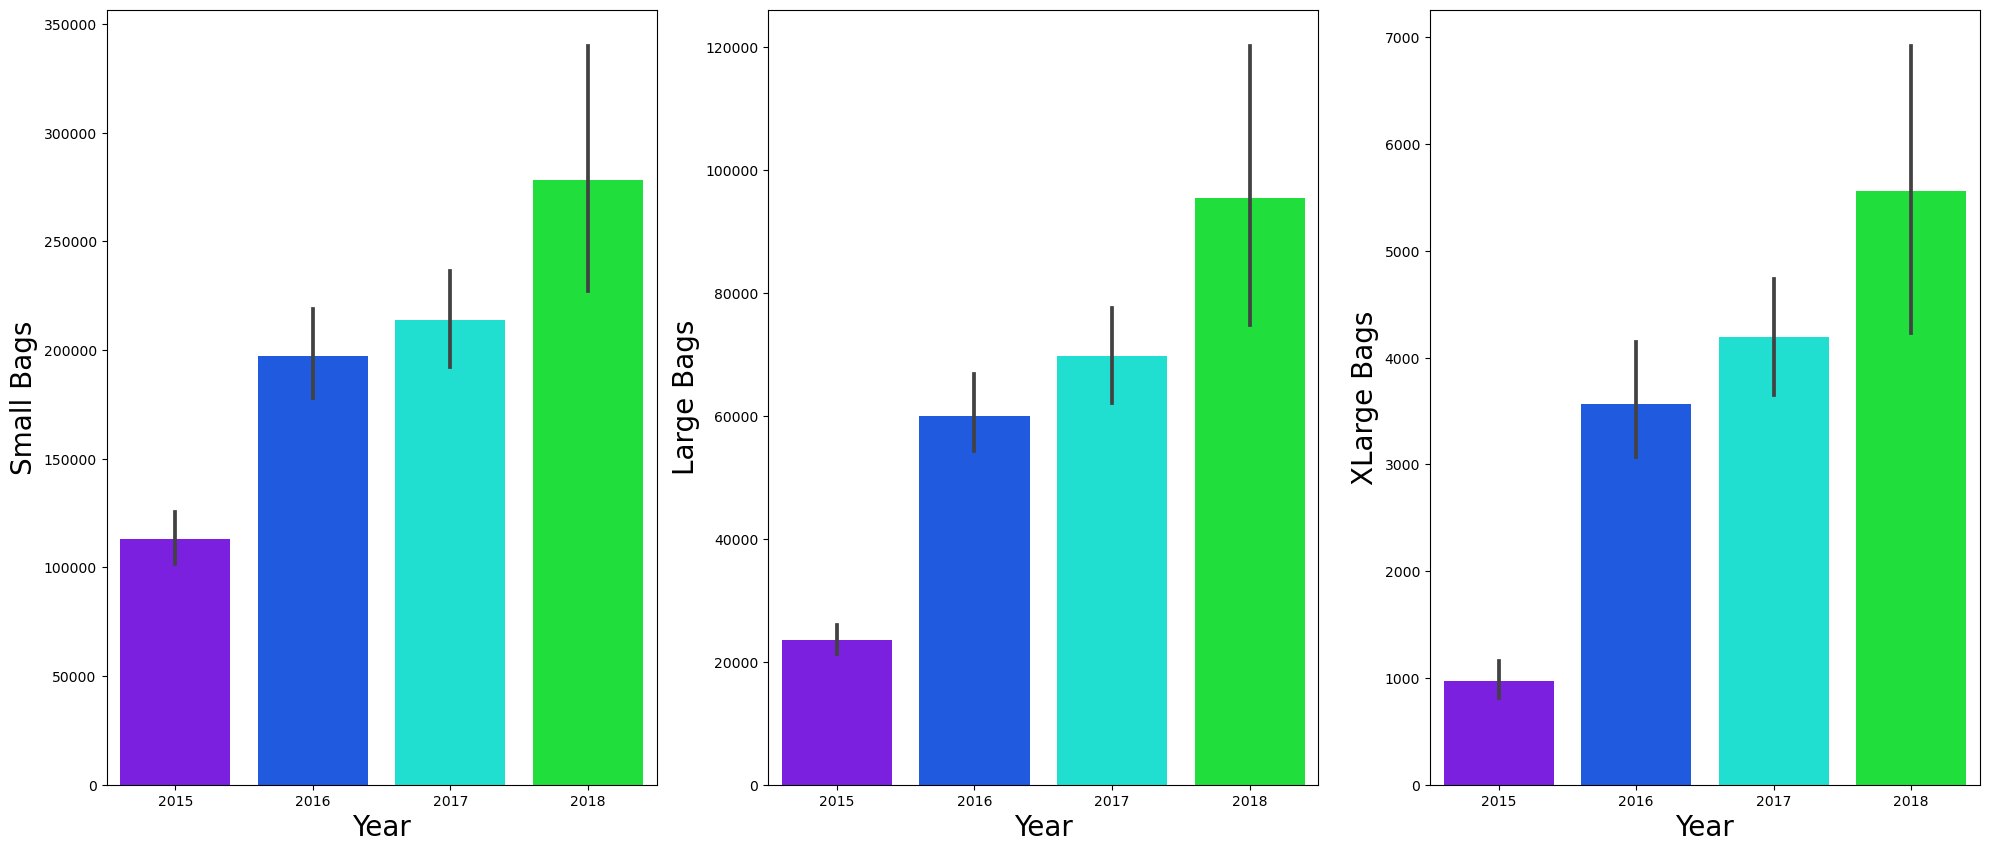

In [53]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
y = df[['Small Bags','Large Bags','XLarge Bags']]
X = df['year']
for col in y:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.barplot(X,y[col])
        plt.xlabel('Year',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()

- Sale of all 3 types of bags has grown over the years. 
- Most of customers prefer buying Small Bags over Large and Xlarge bags.
- There is very narrow Customer segment willing to buy XLarge type bags possiblily more quantity need to consume and price associated with it.

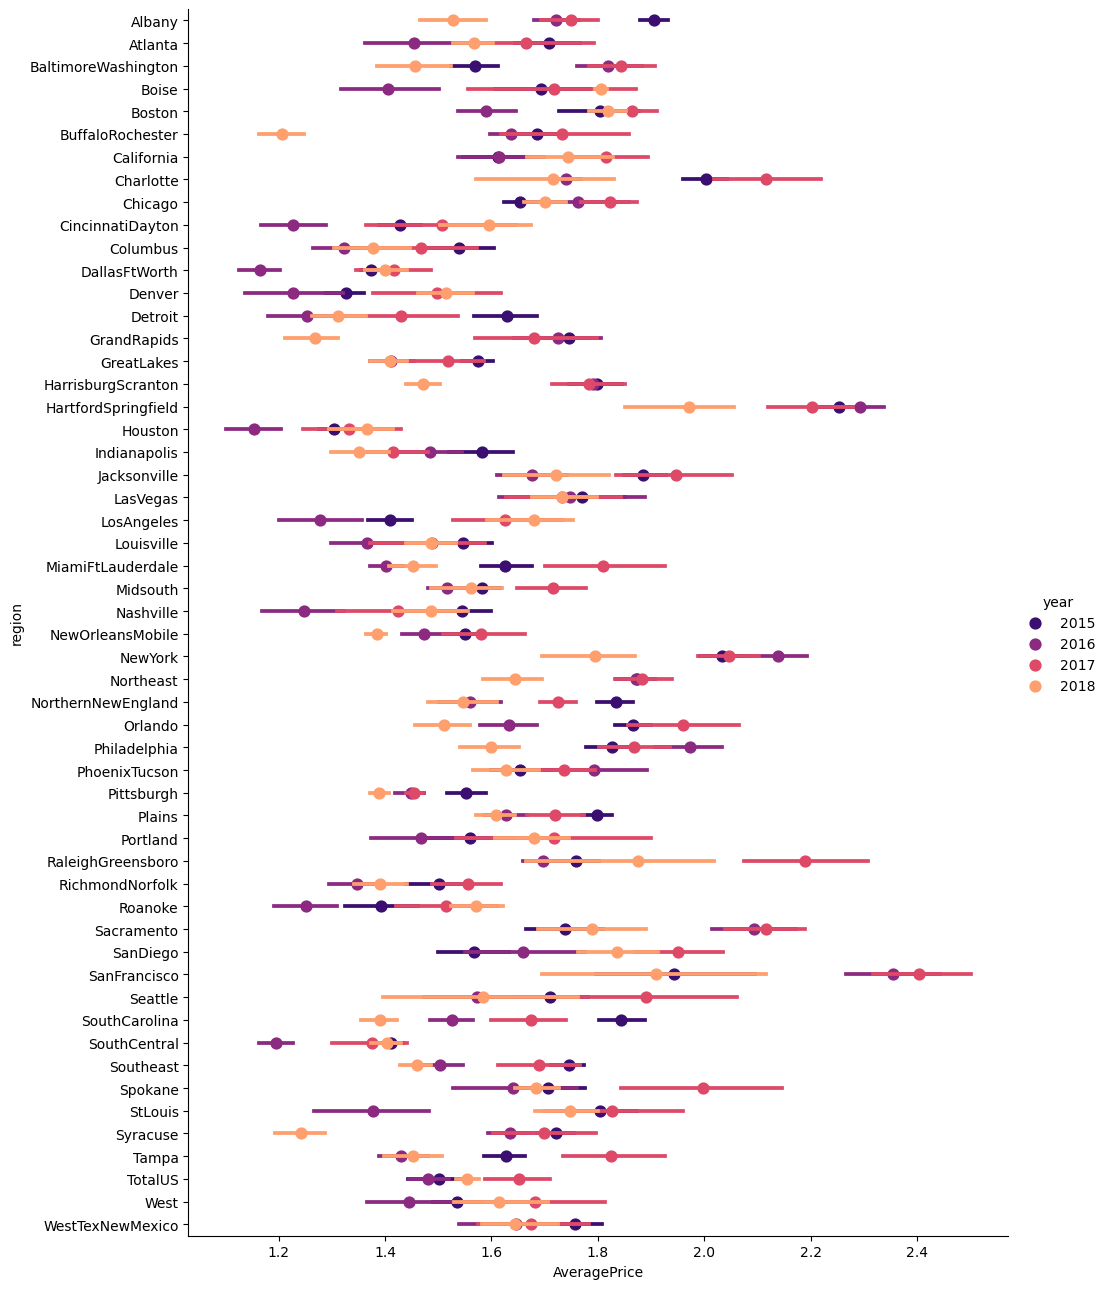

In [54]:
mask = df['type']=='organic'
g = sns.factorplot('AveragePrice','region',data=df[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

- The Average price of the avacado is high in the region San Francisco followed by RaleighGreensboro in the year 2017. The demand of the fruit is high and price also high in the year 2017.

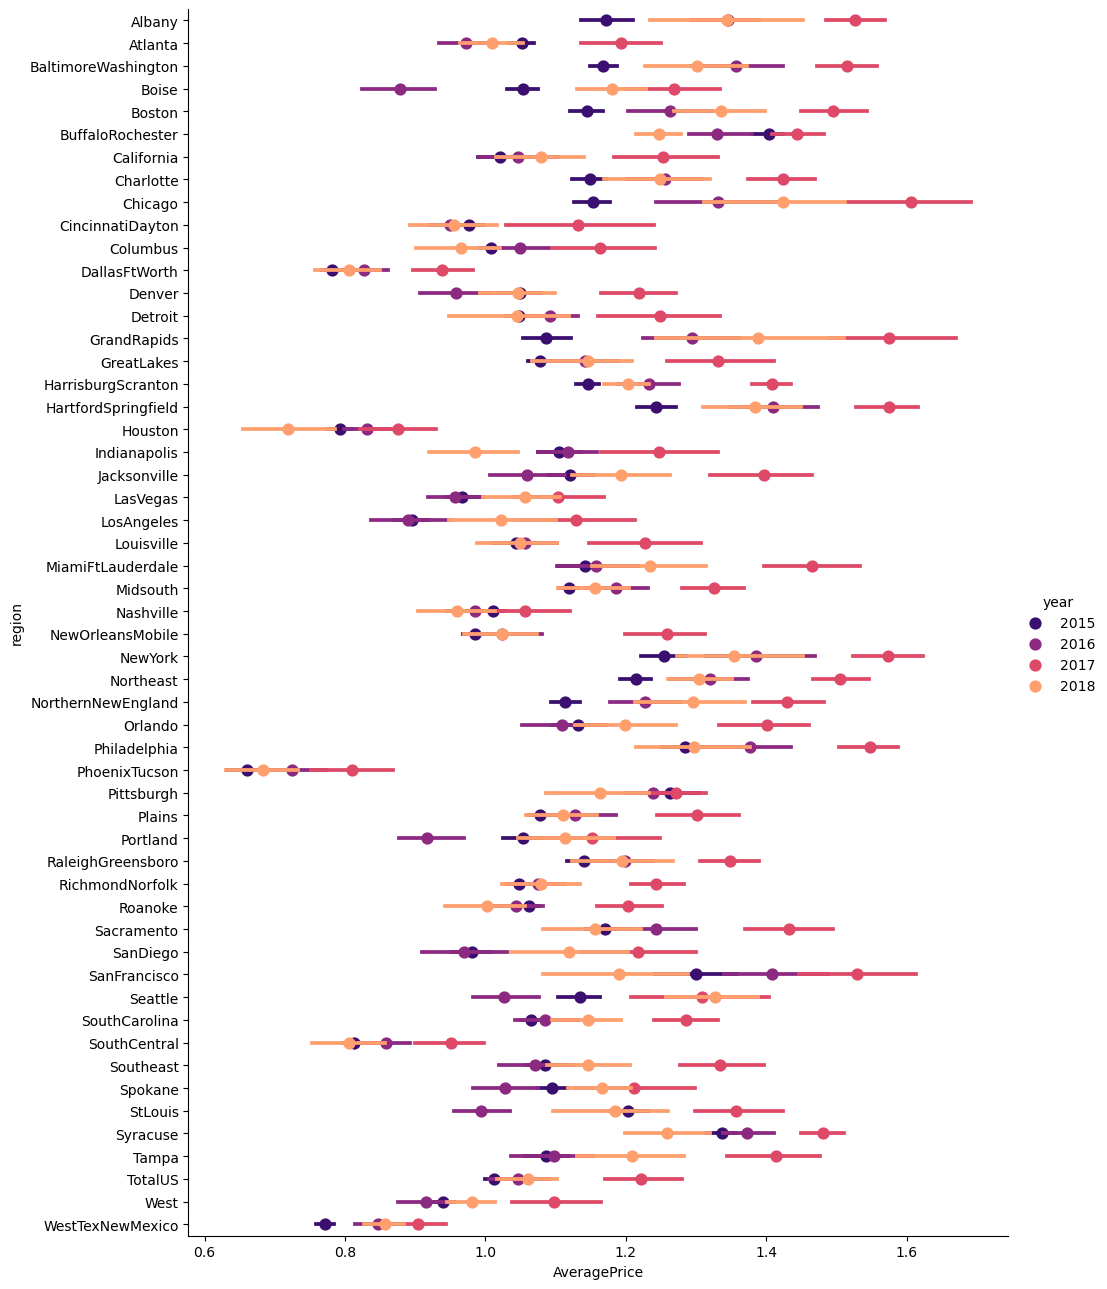

In [55]:
mask = df['type']=='conventional'
g = sns.factorplot('AveragePrice','region',data=df[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
              )

### pairlot

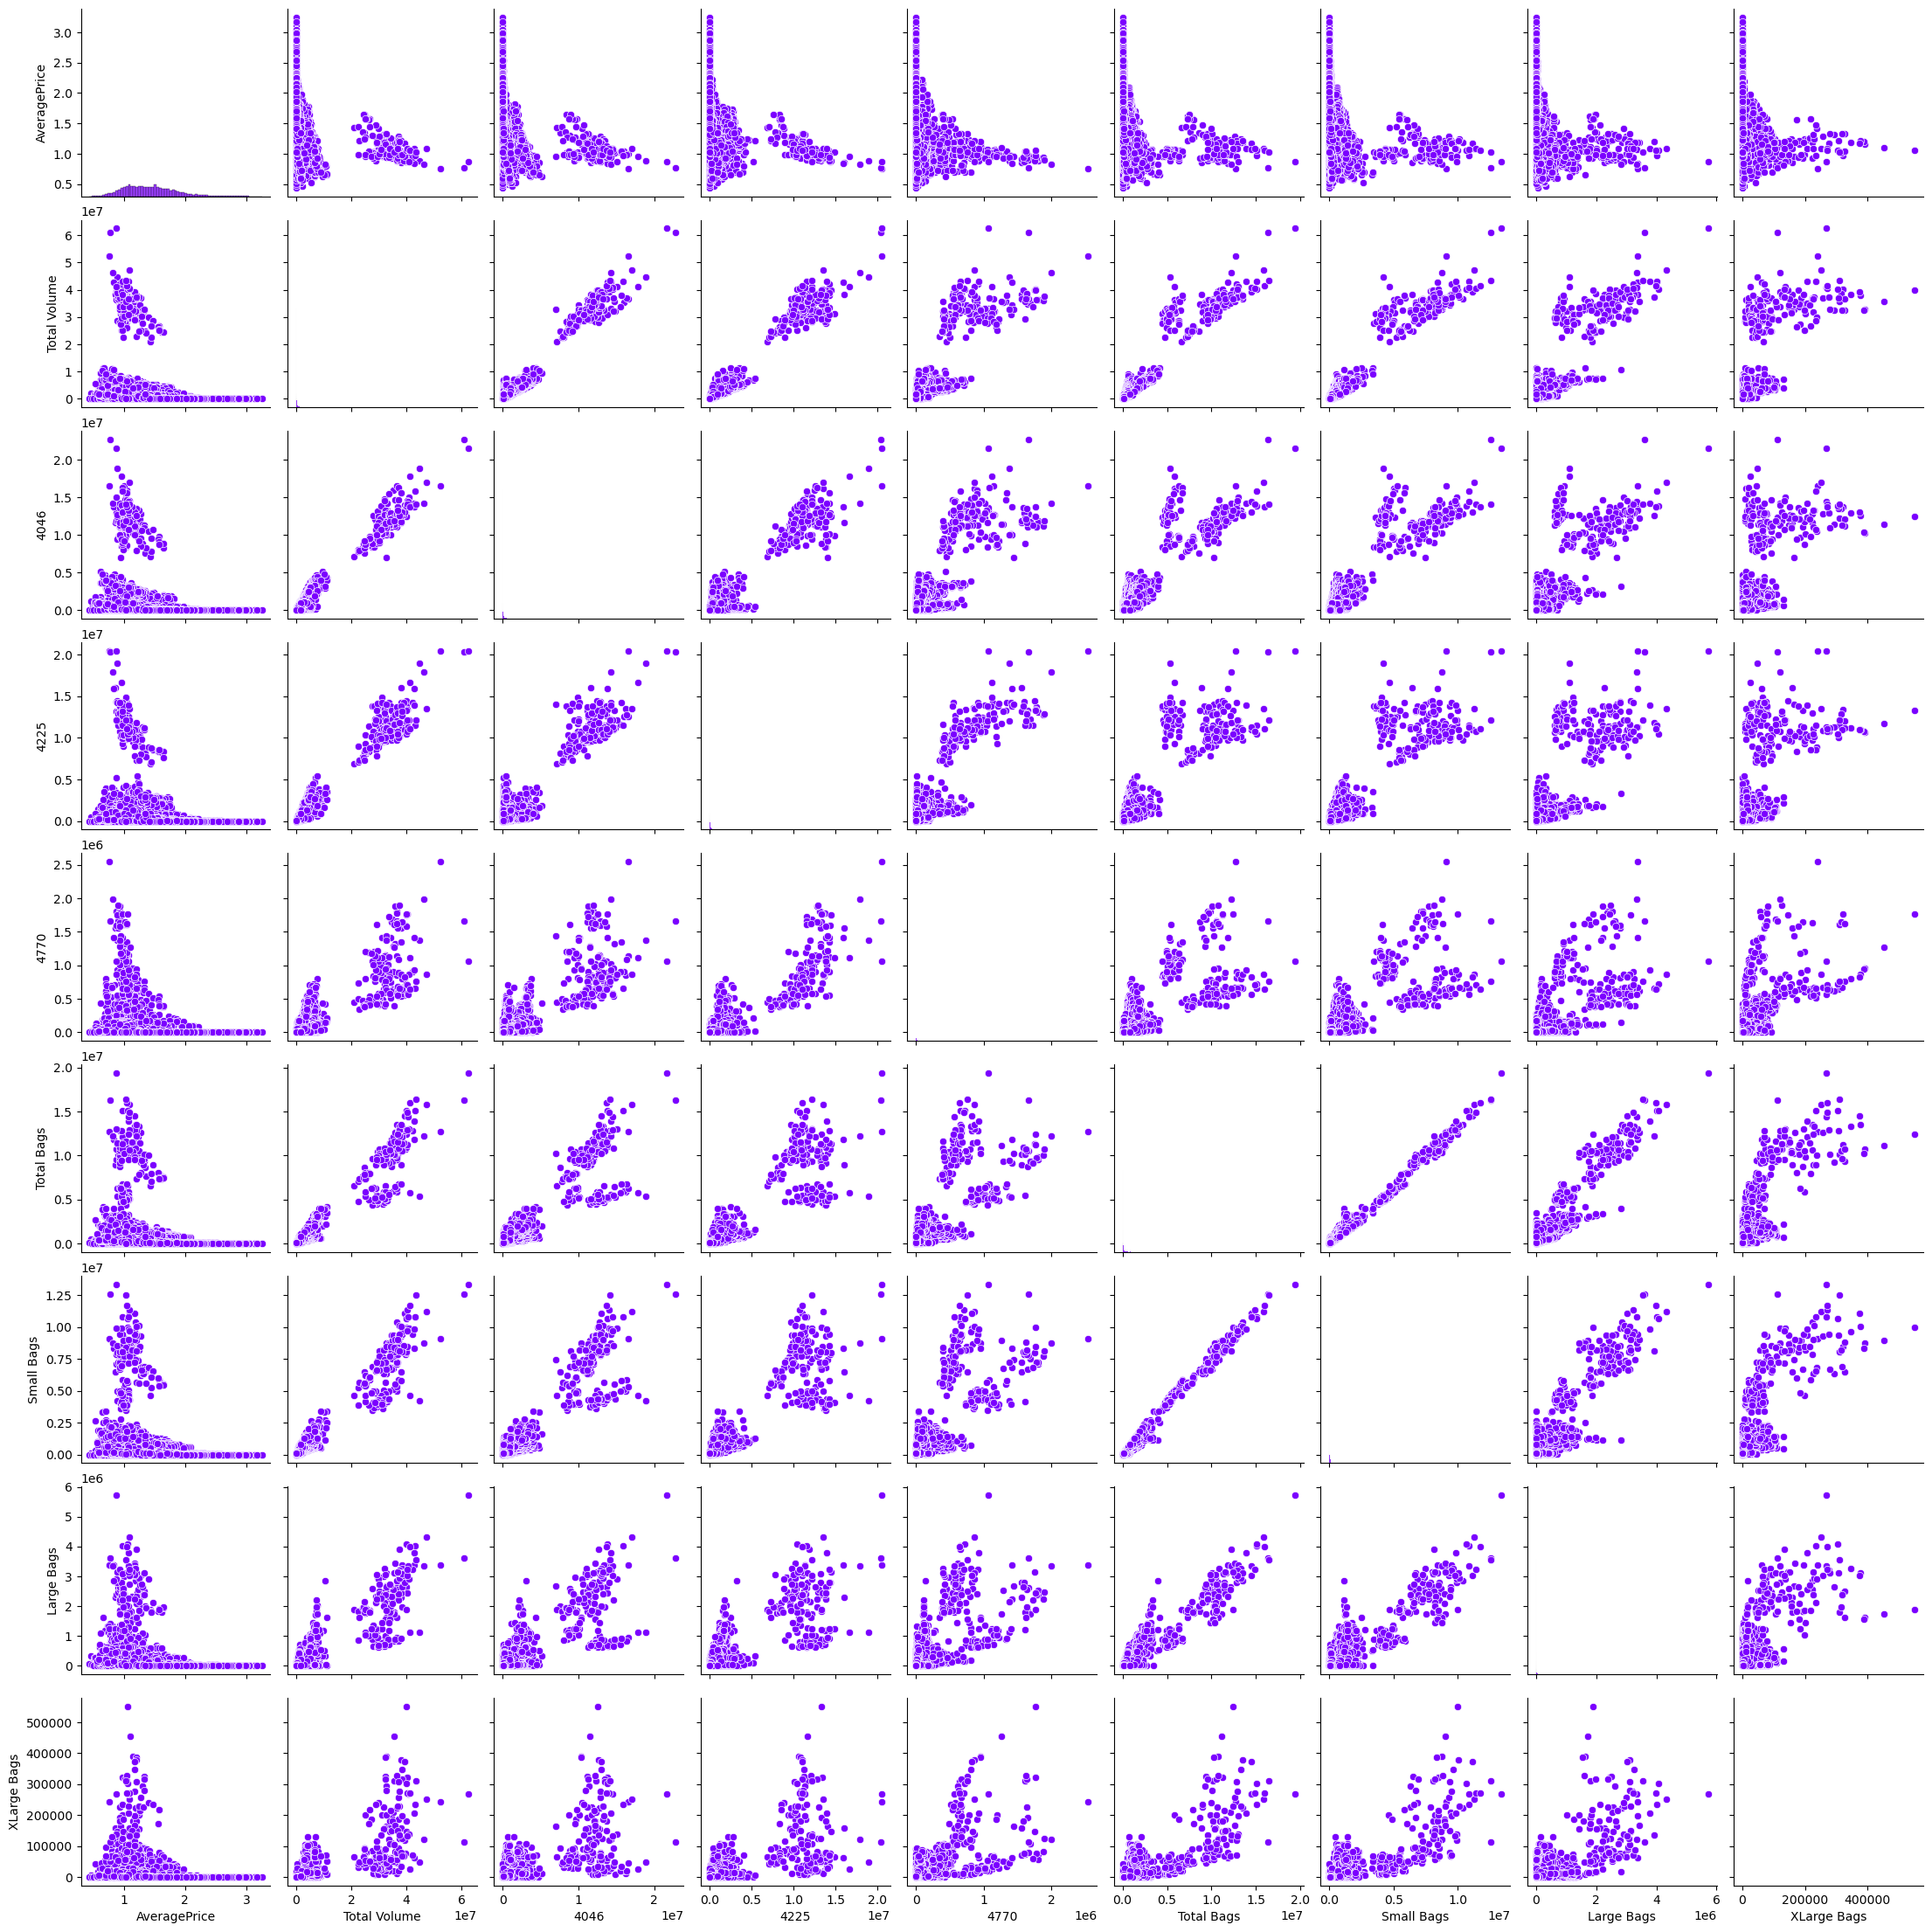

In [56]:
sns.pairplot(df1)

## Encoding categorical data

In [57]:
# Using Label Encoder on target variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2['region']=le.fit_transform(df2['region'])
df2['type']=le.fit_transform(df2['type'])
df2.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,2015,11


## Outlier Detection and Removal

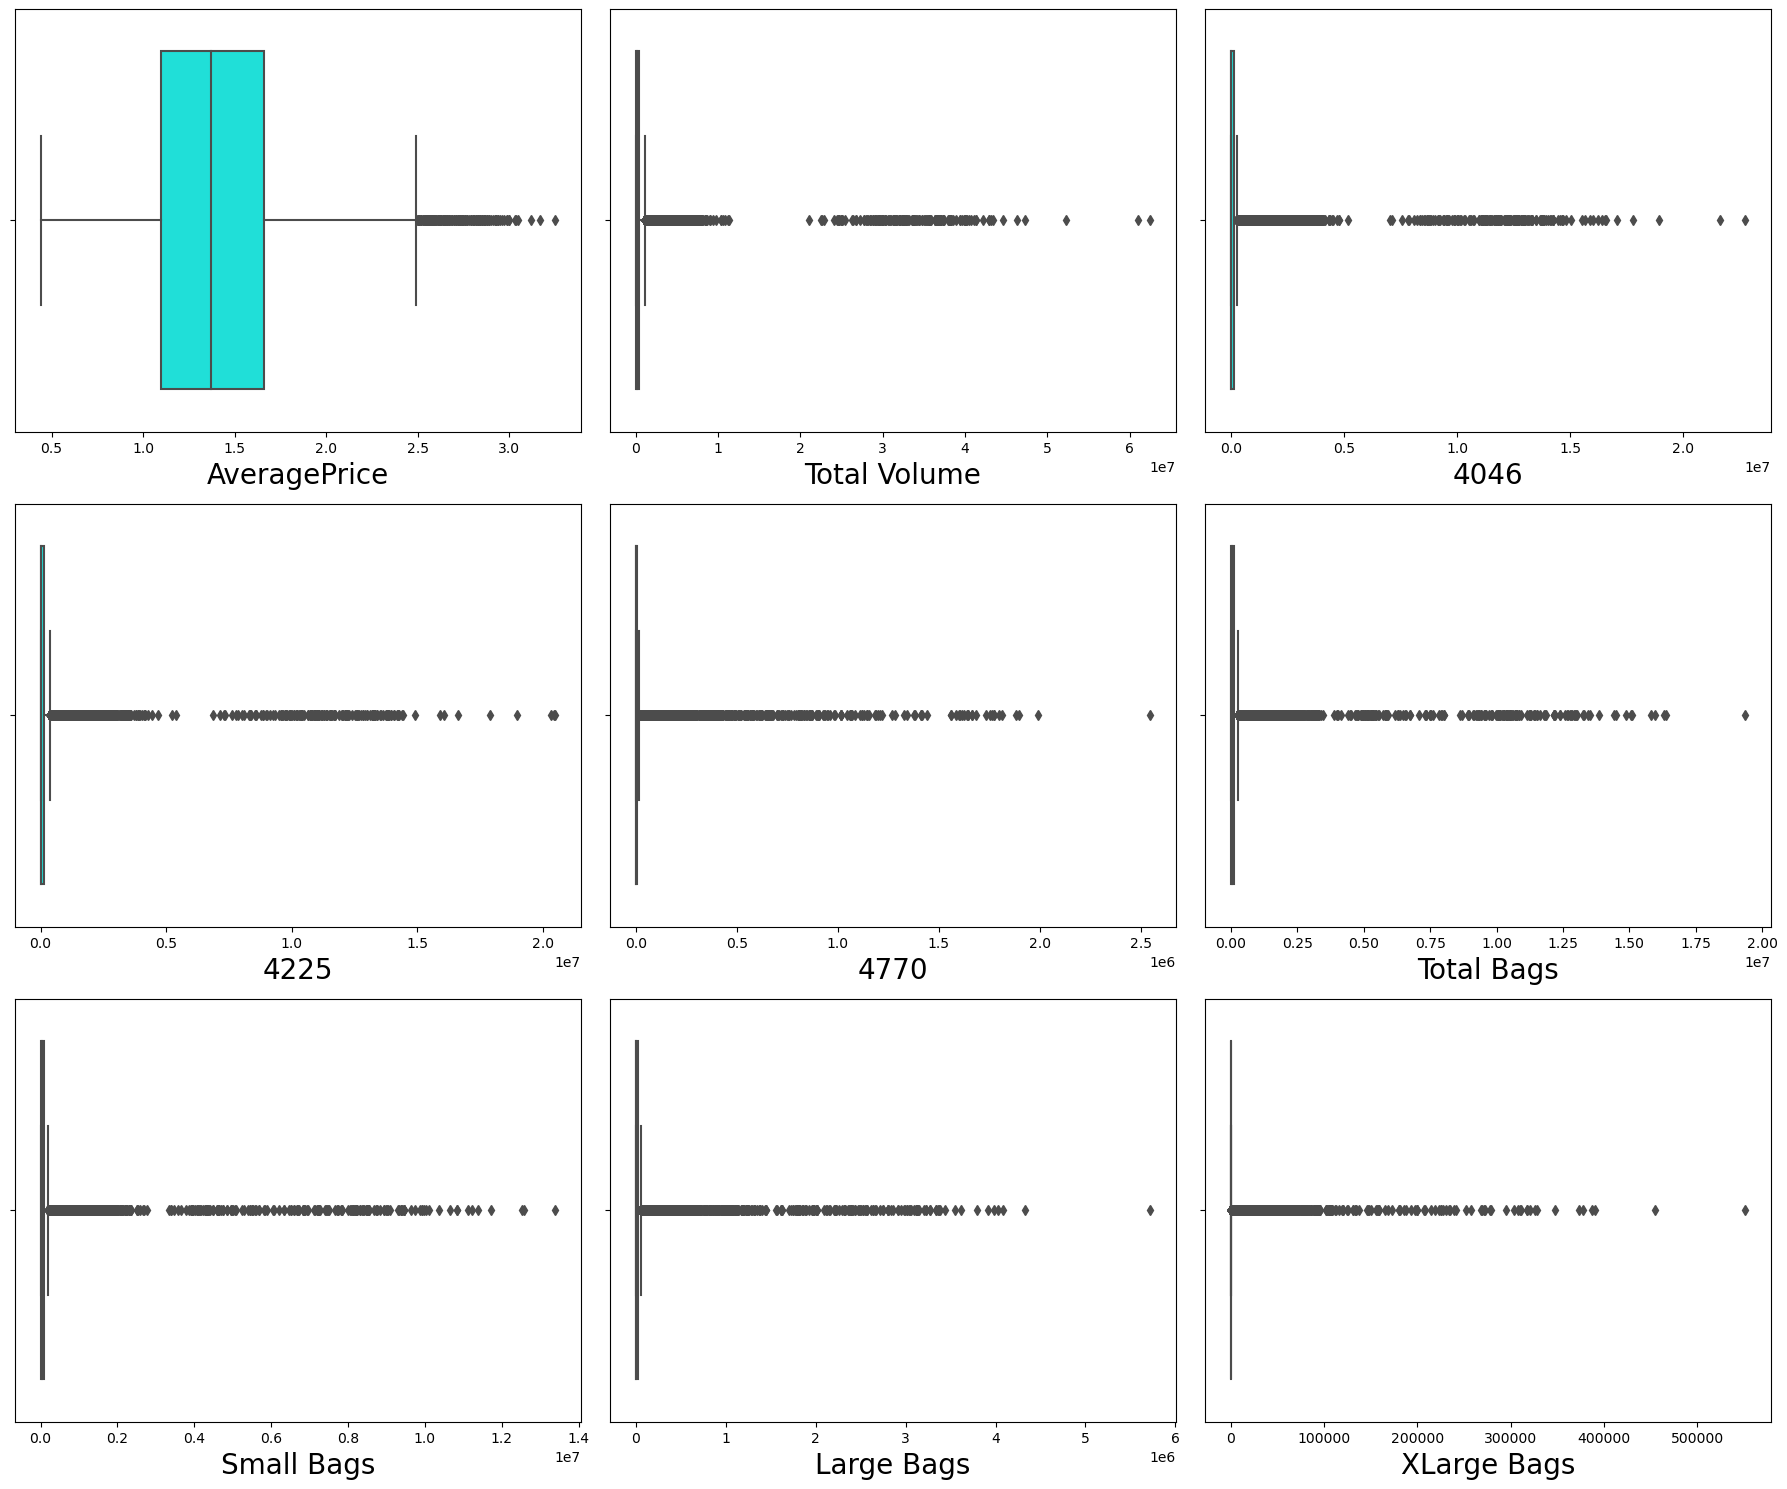

In [58]:
plt.figure(figsize=(18,15), facecolor='white')
plotnumber =1
for column in df1:
    if plotnumber <=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.boxplot(df1[column], palette='hsv')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

In [59]:
from scipy.stats import zscore
z = np.abs(zscore(df2))
threshold = 3
df3 = df2[(z<3).all(axis = 1)]

In [60]:
print("\033[1m"+'Shape of dataset after removing outliers :'+"\033[0m",df3.shape)

Shape of dataset after removing outliers : (17651, 13)


In [61]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((18249-17651)/18249)*100,'%')

Percentage Data Loss : 3.276891884486821 %


## Correlation

In [63]:
df3.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
AveragePrice,1.000000,-0.332056,-0.333577,-0.243988,-0.243465,-0.297323,-0.275771,-0.270915,-0.152669,0.613150,-0.003242,0.091704,0.149502
Total Volume,-0.332056,1.000000,0.876307,0.871592,0.647518,0.912184,0.905648,0.640642,0.513741,-0.415476,0.076676,-0.004866,-0.018645
4046,-0.333577,0.876307,1.000000,0.565118,0.492127,0.727981,0.706800,0.561060,0.415432,-0.341376,0.119067,-0.034636,-0.015797
4225,-0.243988,0.871592,0.565118,1.000000,0.620221,0.757786,0.778761,0.451711,0.392030,-0.383138,0.011002,-0.040234,-0.019844
4770,-0.243465,0.647518,0.492127,0.620221,1.000000,0.557980,0.571512,0.323747,0.495976,-0.321809,-0.095972,-0.082054,-0.027245
Total Bags,-0.297323,0.912184,0.727981,0.757786,0.557980,1.000000,0.978213,0.746946,0.581690,-0.378205,0.085892,0.103442,-0.010916
Small Bags,-0.275771,0.905648,0.706800,0.778761,0.571512,0.978213,1.000000,0.593155,0.597700,-0.367593,0.065976,0.086639,-0.013018
Large Bags,-0.270915,0.640642,0.561060,0.451711,0.323747,0.746946,0.593155,1.000000,0.296864,-0.286813,0.127635,0.119543,-0.001457
XLarge Bags,-0.152669,0.513741,0.415432,0.392030,0.495976,0.581690,0.597700,0.296864,1.000000,-0.263734,-0.044338,0.108209,0.002843
type,0.613150,-0.415476,-0.341376,-0.383138,-0.321809,-0.378205,-0.367593,-0.286813,-0.263734,1.000000,0.018409,0.003867,-0.009499


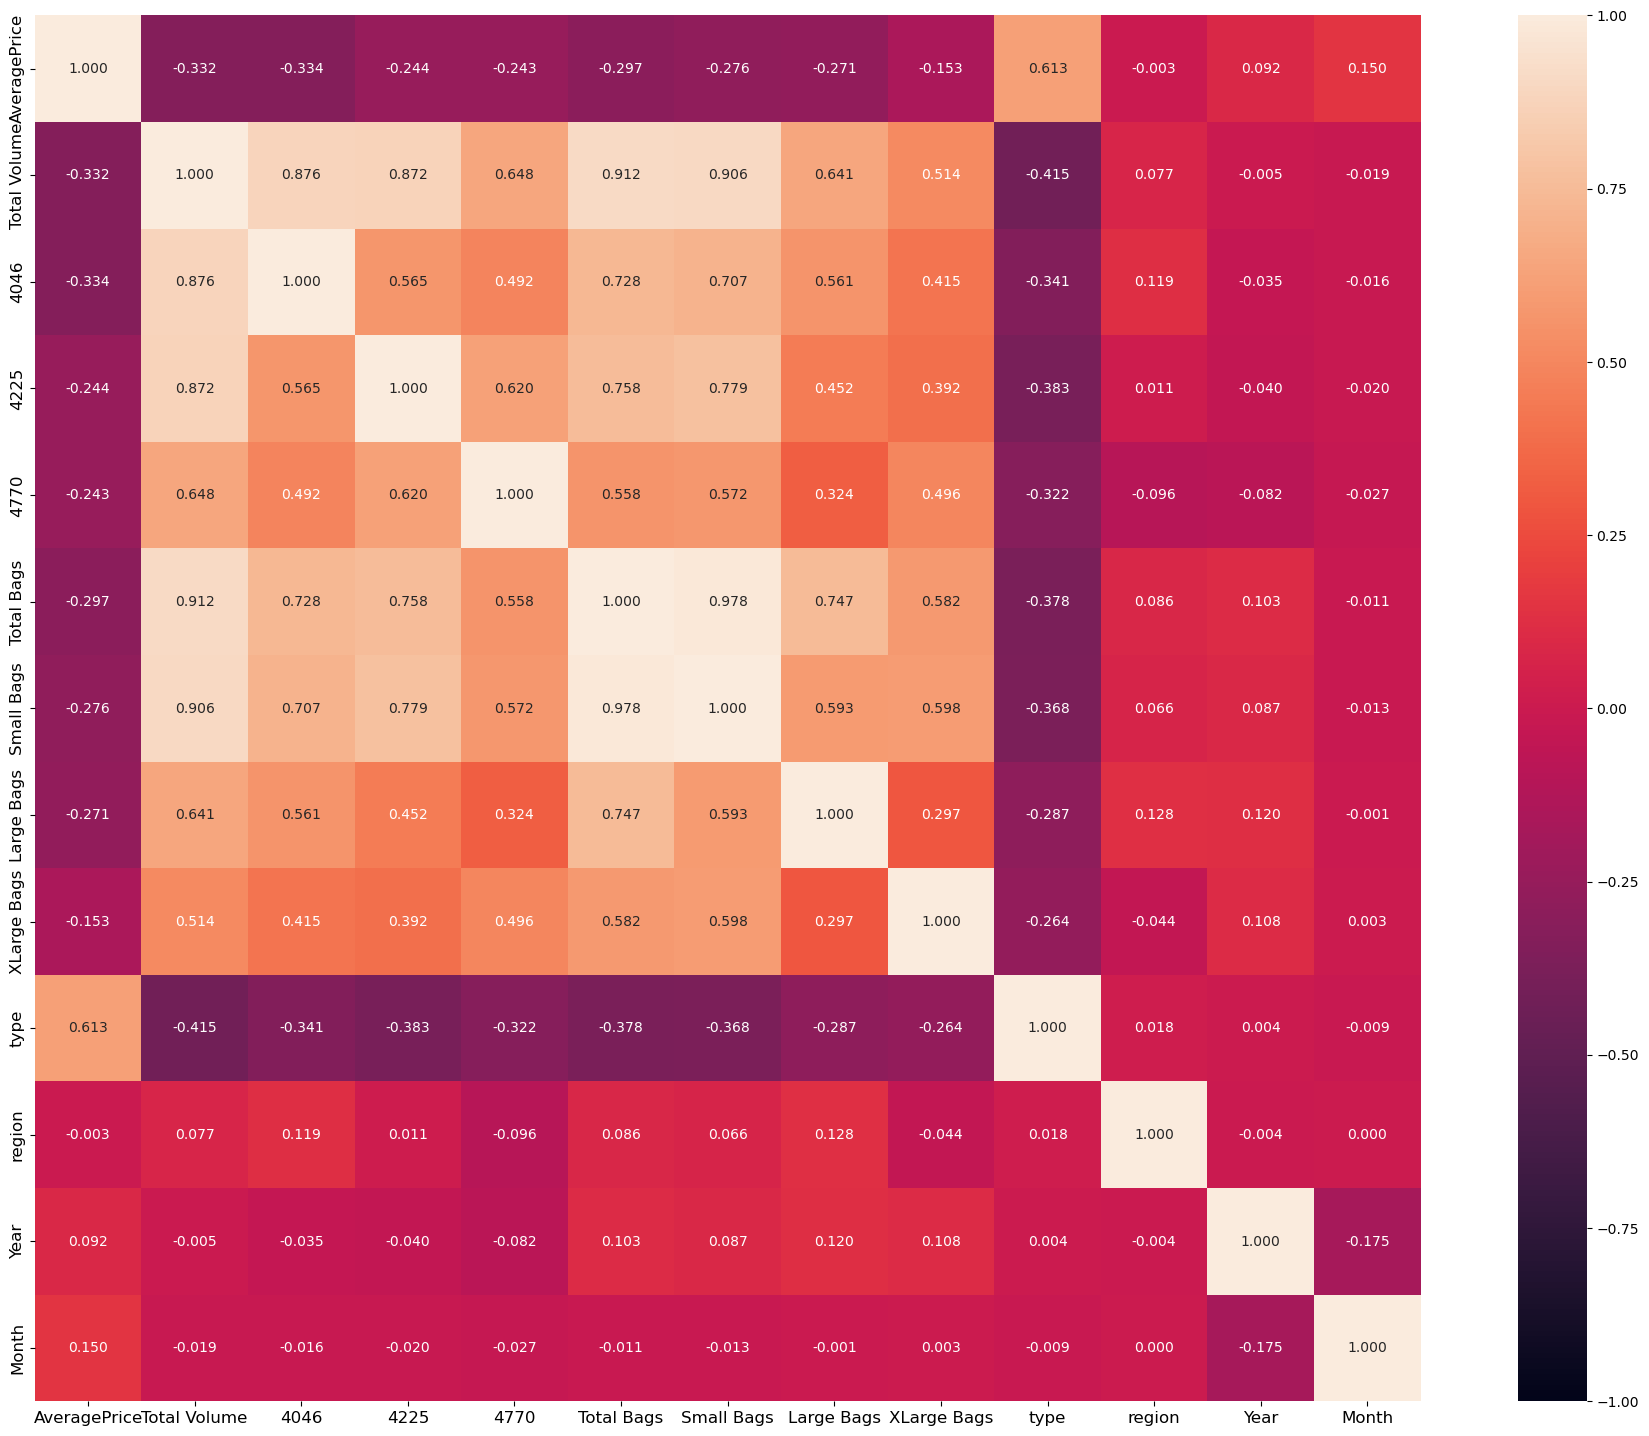

In [64]:
plt.figure(figsize=(25,18))
sns.heatmap(df3.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10},)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

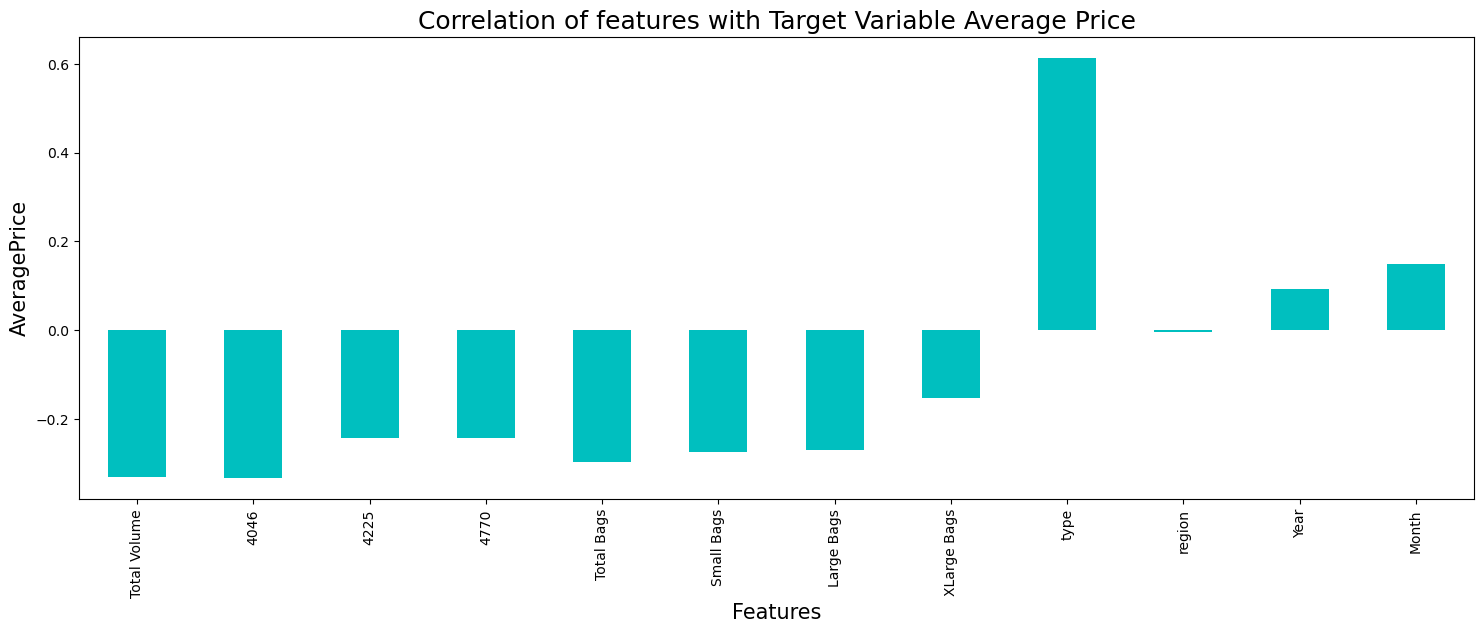

In [65]:
plt.figure(figsize = (18,6))
df3.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('AveragePrice',fontsize=15)
plt.title('Correlation of features with Target Variable Average Price',fontsize = 18)
plt.show()

<b>Almost all features are highly negatively correlated with the target variable and only type,year,month have positive correlation with the target.</b>


   - Total volume is highly correleated 4046.

**We are going to remove some of columns which are not reqire for further analysis**

 - 4046,4225,4770 are shows multicollinearity with Total Volume. These feature are nothing but Total avacado sold under particular grade, which are already counted in Total Volume. As we do not have any price data according each grade of avacado. These feature doesnot have any meaning in ML model.So gone drop them.
 - Same goes with Total bags. Total bags is sum of all other type of bags. We gone keep drop Total bags and going to keep other differnt size bags counts features.
 - Next is region feature, we also going drop this as it very poorly correlated with other features.

In [68]:
df3.drop(columns=['4046','4225','4770','region','Total Bags'],axis=1, inplace=True)

##  Checking Multicollinearity between features using variance_inflation_factor

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df3.values,i) for i in range(df3.shape[1])]
vif['Features']= df3.columns
vif

,VIF,Features
0,24.367038,AveragePrice
1,7.754106,Total Volume
2,7.707277,Small Bags
3,1.970395,Large Bags
4,1.693456,XLarge Bags
5,3.643636,type
6,19.857116,Year
7,4.212261,Month


#### Strategy to Address Multicollinearity :
1. Removing Some of highly correlated features. But this will not work here as most of input features are correlated with each other either moderated or poorly.
2. Another way to address Multicollinerity is to Scaled Data and then apply PCA.

<b> We will go by first way for further investigation. As For Independent feature VIF is within limit of 10 except year.  </b>

We will drop Year as it is less than 20% correlated with target feature and For most of input features correlated with less than 10%.

In [72]:
df3.drop(columns=['Year'],axis=1, inplace=True)

### Checking correlation with target variable after removal of multicollinearity


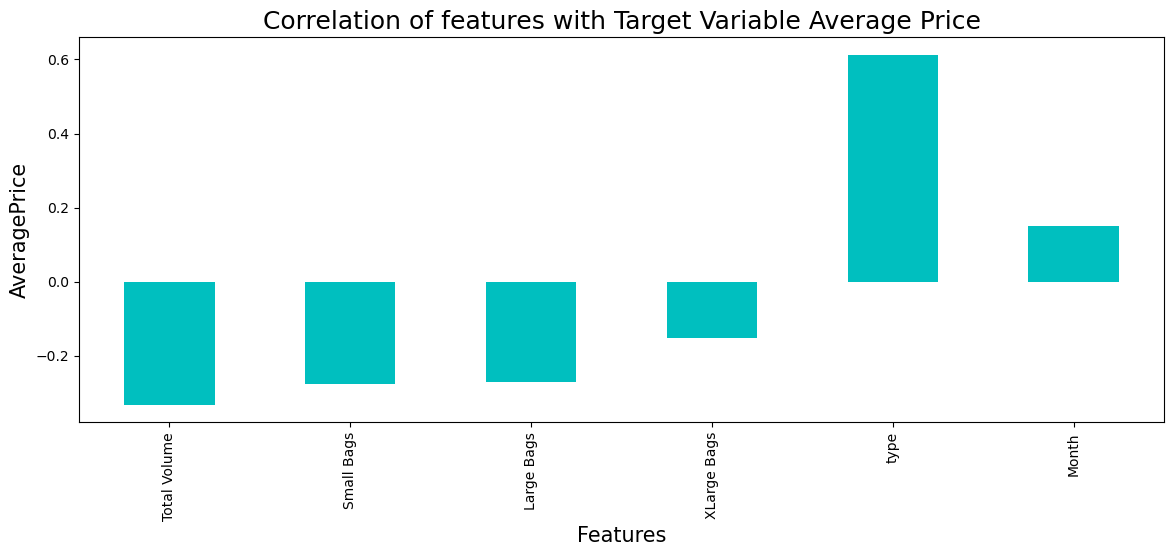

In [74]:
plt.figure(figsize = (14,5))
df3.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('AveragePrice',fontsize=15)
plt.title('Correlation of features with Target Variable Average Price',fontsize = 18)
plt.show()

### Skewness of features

In [76]:
df3.skew()

AveragePrice    0.377432
Total Volume    3.767138
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
Month           0.107408
dtype: float64

### Transforming skewness through log transform

In [79]:
for col in df3.columns:
    if df3.skew().loc[col]>0.55:
        df3[col]=np.log1p(df3[col])

## Standard Scaling

In [80]:
X = df3.drop('AveragePrice', axis=1)
Y = df3['AveragePrice']

In [81]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

### Machine Learning Model Building

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (11826, 6)
Training target vector size: (11826,)
Test feature matrix size: (5825, 6)
Test target vector size: (5825,)


In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.46995615775000343 on Random_state 557


### Linear Regression : Base model


In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=557, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [1.0918524  1.234798   1.60179338 ... 1.70481371 1.6431685  1.6354547 ]


Actual Wins:
 8841     1.35
859      1.19
17369    2.09
11190    1.05
14051    2.03
         ... 
5452     1.05
3489     1.35
14534    1.22
11925    1.71
11077    1.83
Name: AveragePrice, Length: 5825, dtype: float64


### Linear Regression Evaluation Matrix


In [86]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
print('\033[1m'+' Error :'+'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print('\033[1m'+' R2 Score :'+'\033[0m')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

 Error :
Mean absolute error : 0.22390630602712788
Mean squared error : 0.08082880539614365
Root Mean Squared Error: 0.2843040720709847


 R2 Score :
0.46995615775000343


In [87]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =5)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : -0.013708960907187184


### Applying other Regression Model, Evaluation & Crossvalidation

In [96]:
RFR = RandomForestRegressor()
DTC = DecisionTreeRegressor()
svr = SVR()
KNR = KNeighborsRegressor()
ABR = AdaBoostRegressor()
ETR = AdaBoostRegressor()
gradb = GradientBoostingRegressor()
knn = KNeighborsRegressor()
ls = Lasso()
rd = Ridge()



Model = [RFR,DTC,svr,KNR,ABR,ETR,gradb,knn,ls,rd]

for m in Model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)                                      
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred))
    print('==============================================================================================================')

 Error of  RandomForestRegressor() :
Mean absolute error : 0.1610916566523605
Mean squared error : 0.0477770997888412
Root Mean Squared Error: 0.2185797332527451
 R2 Score :
0.6866963773678747
 Error of  DecisionTreeRegressor() :
Mean absolute error : 0.20948497854077253
Mean squared error : 0.09087826609442061
Root Mean Squared Error: 0.3014602230716693
 R2 Score :
0.40405570635833676
 Error of  SVR() :
Mean absolute error : 0.19486174214258856
Mean squared error : 0.0650325649725532
Root Mean Squared Error: 0.2550148328481173
 R2 Score :
0.5735417535804728
 Error of  KNeighborsRegressor() :
Mean absolute error : 0.18217304721030042
Mean squared error : 0.05897708841201717
Root Mean Squared Error: 0.2428519886927368
 R2 Score :
0.6132512117008875
 Error of  AdaBoostRegressor() :
Mean absolute error : 0.22546058484003634
Mean squared error : 0.07894364238402575
Root Mean Squared Error: 0.2809691128647876
 R2 Score :
0.4823183229621868
 Error of  AdaBoostRegressor() :
Mean absolute erro

In [98]:
# Cross Validation
model = [RFR,DTC,svr,KNR,ABR,ETR,gradb,knn,ls,rd]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score :',m,":"+'\033[0m\n')
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() :

Mean CV Score : -0.18674821430987235


Cross Validation Score : DecisionTreeRegressor() :

Mean CV Score : -0.8675963499576351


Cross Validation Score : SVR() :

Mean CV Score : -0.1008757310659687


Cross Validation Score : KNeighborsRegressor() :

Mean CV Score : -0.2734400530404119


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : -0.12128194339181533


Cross Validation Score : AdaBoostRegressor() :

Mean CV Score : -0.10894370880814581


Cross Validation Score : GradientBoostingRegressor() :

Mean CV Score : -0.028826384560859085


Cross Validation Score : KNeighborsRegressor() :

Mean CV Score : -0.2734400530404119


Cross Validation Score : Lasso() :

Mean CV Score : -1.156669674837169


Cross Validation Score : Ridge() :

Mean CV Score : -0.013718733575487608


Among all Model Random Forest Regressor gave us maximum R2 score of 0.6866 and minimum RMSE value of 0.2815. So We will perform Hyper Parameter Tuning on Random Forest Regressor.

In [99]:
Final_mod = RandomForestRegressor()
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print('\033[1m'+' Error in Final Model :' +'\033[0m')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('\033[1m'+' R2 Score of Final Model :'+'\033[0m')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.16070017167381973
Mean squared error : 0.04765678274506437
Root Mean Squared Error: 0.21830433514949807


 R2 Score of Final Model :
0.6874853697061762




 True Values Vs Predicted Value plot :


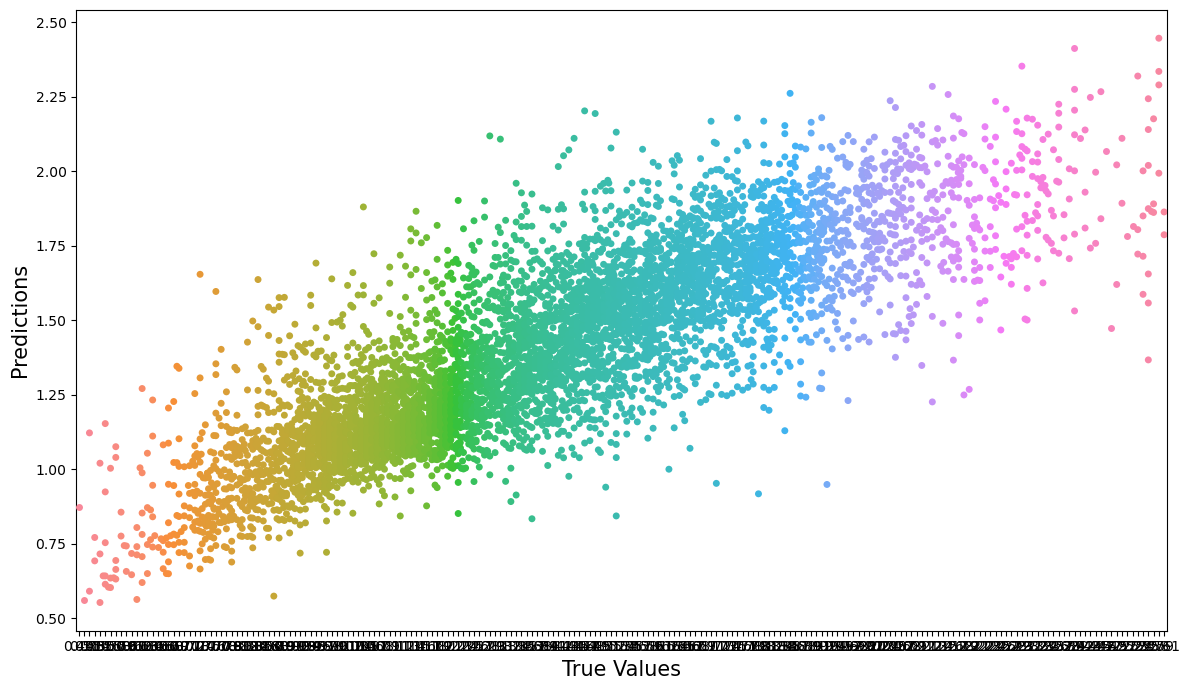

In [101]:
plt.figure(figsize=(12,7))
y_pred=Final_mod.predict(X_test)
sns.swarmplot(Y_test.round(2), y_pred)
print('\033[1m'+' True Values Vs Predicted Value plot :' +'\033[0m')
plt.xlabel('True Values' , fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.tight_layout()

### Saving Model

In [102]:
import joblib
joblib.dump(Final_mod,'Avacado Final.pkl')

['Avacado Final.pkl']